<a href="https://colab.research.google.com/github/huseinsalman23476/submission-analisis-data/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Submission Analisis Data

## Menyiapkan semua library yang dibutuhkan

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [108]:
day_df = pd.read_csv("https://raw.githubusercontent.com/huseinsalman23476/submission-analisis-data/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [109]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/huseinsalman23476/submission-analisis-data/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [110]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [111]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [112]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [113]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [114]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [115]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [116]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [117]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [118]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

In [119]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


##### Memperbaiki tipe data

In [120]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [121]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [122]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Membersihkan tabel `hour_df`

In [123]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Memperbaiki tipe data

In [124]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])

In [125]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [126]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [127]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [128]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
557,558,2012-07-11,3,1,7,0,3,1,1,0.716667,0.650271,0.633333,0.151733,975,6289,7264
423,424,2012-02-28,1,1,2,0,2,1,1,0.359167,0.353525,0.395833,0.193417,229,4134,4363
700,701,2012-12-01,4,1,12,0,6,0,2,0.298333,0.316904,0.806667,0.059704,951,4240,5191
333,334,2011-11-30,4,0,11,0,3,1,1,0.325000,0.311221,0.613333,0.271158,188,3425,3613
703,704,2012-12-04,4,1,12,0,2,1,1,0.475833,0.469054,0.733750,0.174129,551,6055,6606


In [129]:
day_df.instant.is_unique

True

In [130]:
day_df.instant.duplicated

<bound method Series.duplicated of 0        1
1        2
2        3
3        4
4        5
      ... 
726    727
727    728
728    729
729    730
730    731
Name: instant, Length: 731, dtype: int64>

In [131]:
day_df["season_label"] = day_df["season"].apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))

In [132]:
day_df.sample(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
179,180,2011-06-29,3,0,6,0,3,1,1,0.728333,0.654688,0.497917,0.261821,848,4377,5225,Fall
71,72,2011-03-13,1,0,3,0,0,0,1,0.384348,0.380091,0.527391,0.270604,982,1435,2417,Spring
455,456,2012-03-31,2,1,3,0,6,0,2,0.424167,0.421708,0.738333,0.250617,2301,3934,6235,Summer
78,79,2011-03-20,1,0,3,0,0,0,1,0.332500,0.325750,0.473750,0.207721,1047,1424,2471,Spring
641,642,2012-10-03,4,1,10,0,3,1,2,0.657500,0.599133,0.793750,0.066546,728,6844,7572,Winter
525,526,2012-06-09,2,1,6,0,6,0,1,0.710833,0.648367,0.437083,0.144287,2708,4790,7498,Summer
144,145,2011-05-25,2,0,5,0,3,1,1,0.660833,0.615542,0.696250,0.154233,740,4238,4978,Summer
305,306,2011-11-02,4,0,11,0,3,1,1,0.377500,0.390133,0.718750,0.082092,370,3816,4186,Winter
681,682,2012-11-12,4,1,11,1,1,0,1,0.485000,0.475383,0.741667,0.173517,1097,5172,6269,Winter
64,65,2011-03-06,1,0,3,0,0,0,2,0.376522,0.366252,0.948261,0.343287,114,491,605,Spring


In [133]:
day_df.groupby(by="season_label").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
})

instant   cnt                                         
             nunique   max   min         mean          std      sum
season_label                                                       
Fall             188  8714  1115  5644.303191  1459.800381  1061129
Spring           181  7836   431  2604.132597  1399.942119   471348
Summer           184  8362   795  4992.331522  1695.977235   918589
Winter           178  8555    22  4728.162921  1699.615261   841613

In [134]:
day_df.groupby(by="season_label").cnt.sum().sort_values(ascending=False)

season_label
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

In [135]:
day_df["holiday_label"] = day_df["holiday"].apply(lambda x: "Holiday" if x == 1 else "Non Holiday")

In [136]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,holiday_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Non Holiday
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Non Holiday
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Non Holiday
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Non Holiday
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Non Holiday


In [137]:
day_df.groupby(by="holiday_label").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
})

instant   cnt                                         
              nunique   max   min         mean          std      sum
holiday_label                                                       
Holiday            21  7403  1000  3735.000000  2103.350660    78435
Non Holiday       710  8714    22  4527.104225  1929.013947  3214244

In [138]:
day_df["weekday_label"] = day_df["weekday"].apply(lambda x: "Sun" if x == 0 else ("Mon" if x == 1 else ("Tue" if x == 2 else ("Wed" if x == 3 else ("Thur" if x == 4 else ("Fri" if x == 5 else "Sat"))))))

In [139]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,holiday_label,weekday_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Non Holiday,Sat
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Non Holiday,Sun
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Non Holiday,Mon
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Non Holiday,Tue
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Non Holiday,Wed


In [140]:
day_df.groupby(by="weekday_label").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
})

instant   cnt                                        
              nunique   max   min         mean          std     sum
weekday_label                                                      
Fri               104  8362  1167  4690.288462  1874.624870  487790
Mon               105  7525    22  4338.123810  1793.074013  455503
Sat               105  8714   627  4550.542857  2196.693009  477807
Sun               105  8227   605  4228.828571  1872.496629  444027
Thur              104  7804   431  4667.259615  1939.433317  485395
Tue               104  7767   683  4510.663462  1826.911642  469109
Wed               104  8173   441  4548.538462  2038.095884  473048

In [141]:
day_df.groupby(by="weekday_label").cnt.sum().sort_values(ascending=False)

weekday_label
Fri     487790
Thur    485395
Sat     477807
Wed     473048
Tue     469109
Mon     455503
Sun     444027
Name: cnt, dtype: int64

In [142]:
day_df["workingday_label"] = day_df["workingday"].apply(lambda x: "Working Day" if x == 1 else "Non Working Day")

In [143]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,holiday_label,weekday_label,workingday_label
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Spring,Non Holiday,Sat,Non Working Day
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Spring,Non Holiday,Sun,Non Working Day
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Spring,Non Holiday,Mon,Working Day
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Spring,Non Holiday,Tue,Working Day
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Spring,Non Holiday,Wed,Working Day


In [144]:
day_df.groupby(by="workingday_label").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
})

instant   cnt                                        
                 nunique   max  min         mean          std      sum
workingday_label                                                      
Non Working Day      231  8714  605  4330.168831  2052.141245  1000269
Working Day          500  8362   22  4584.820000  1878.415583  2292410

In [145]:
day_df["weathersit_label"] = day_df["weathersit"].apply(lambda x: "Clear, Few Clouds" if x == 1 else ("Mist + Cloudy" if x == 2 else ("Light Snow, Light Rain" if x == 3 else "Heavy Rain + Ice Pallets, Snow")))

In [146]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,season_label,holiday_label,weekday_label,workingday_label,weathersit_label
81,82,2011-03-23,2,0,3,0,3,1,2,0.346957,...,0.839565,0.234261,203,1918,2121,Summer,Non Holiday,Wed,Working Day,Mist + Cloudy
502,503,2012-05-17,2,1,5,0,4,1,1,0.593333,...,0.520000,0.229475,1242,6142,7384,Summer,Non Holiday,Thur,Working Day,"Clear, Few Clouds"
471,472,2012-04-16,2,1,4,1,1,0,1,0.664167,...,0.561667,0.284829,1198,5172,6370,Summer,Holiday,Mon,Non Working Day,"Clear, Few Clouds"
96,97,2011-04-07,2,0,4,0,4,1,1,0.437500,...,0.602917,0.162312,571,2570,3141,Summer,Non Holiday,Thur,Working Day,"Clear, Few Clouds"
345,346,2011-12-12,4,0,12,0,1,1,1,0.238333,...,0.670833,0.063450,143,3167,3310,Winter,Non Holiday,Mon,Working Day,"Clear, Few Clouds"


In [147]:
day_df.groupby(by="weathersit_label").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
})

instant   cnt                                        
                       nunique   max  min         mean          std      sum
weathersit_label                                                            
Clear, Few Clouds          463  8714  431  4876.786177  1879.483989  2257952
Light Snow, Light Rain      21  4639   22  1803.285714  1240.284449    37869
Mist + Cloudy              247  8362  605  4035.862348  1809.109918   996858

In [148]:
day_df.groupby(by="weathersit_label").cnt.sum().sort_values(ascending=False)

weathersit_label
Clear, Few Clouds         2257952
Mist + Cloudy              996858
Light Snow, Light Rain      37869
Name: cnt, dtype: int64

In [149]:
day_df.groupby(by="yr").agg({
    "casual": ["max", "min", "mean", "std", "sum"],
    "registered": ["max", "min", "mean", "std", "sum"]
})

casual                                      registered                    \
      max min         mean         std     sum        max  min         mean   
yr                                                                            
0    3065   9   677.402740  556.269121  247252       4614  416  2728.358904   
1    3410   2  1018.483607  758.989897  372765       6946   20  4581.450820   

                          
            std      sum  
yr                        
0   1060.110413   995851  
1   1424.331846  1676811

In [150]:
day_df.corr(numeric_only = True)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


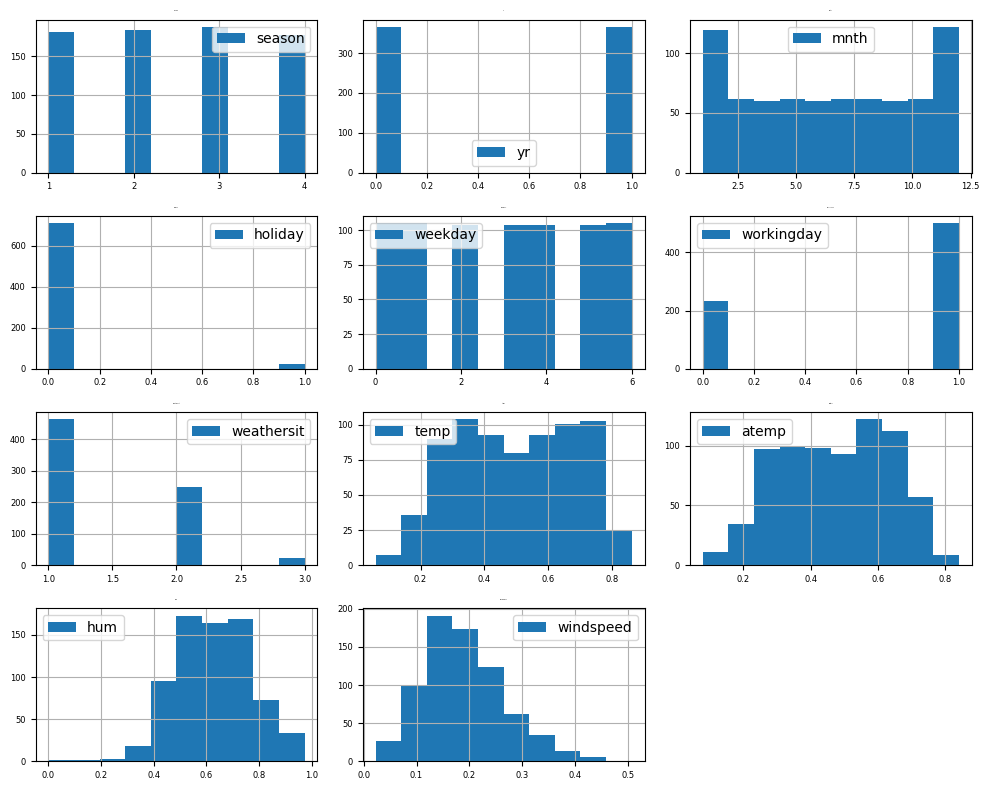

In [151]:
import matplotlib

params = {'axes.titlesize':'0'}
matplotlib.rcParams.update(params)

day_df.hist(column=["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"],
            figsize=(10,8),
            legend=True,
            xlabelsize=6,
            ylabelsize=6)

plt.tight_layout()
plt.show()

# matplotlib.rcParams.update(matplotlib.rcParamsDefault)  # to revert to default settings
# df.hist(figsize=(50, 30))

### Explore `hour_df`

In [152]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1723,1724,2011-03-17,1,0,3,11,0,4,1,1,0.44,0.4394,0.54,0.2836,20,66,86
1353,1354,2011-03-01,1,0,3,16,0,2,1,1,0.34,0.3485,0.34,0.0896,10,92,102
8210,8211,2011-12-13,4,0,12,18,0,2,1,1,0.34,0.3182,0.42,0.2239,12,370,382
8056,8057,2011-12-07,4,0,12,8,0,3,1,3,0.44,0.4394,1.00,0.0000,6,80,86
15153,15154,2012-09-28,4,1,9,14,0,5,1,2,0.70,0.6515,0.54,0.2537,105,294,399


In [153]:
hour_df.instant.is_unique

True

In [154]:
hour_df.instant.duplicated

<bound method Series.duplicated of 0            1
1            2
2            3
3            4
4            5
         ...  
17374    17375
17375    17376
17376    17377
17377    17378
17378    17379
Name: instant, Length: 17379, dtype: int64>

In [155]:
hour_df["season_label"] = hour_df["season"].apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))

In [156]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label
2251,2252,2011-04-08,2,0,4,16,0,5,1,2,0.32,0.3030,0.93,0.2537,2,58,60,Summer
11672,11673,2012-05-06,2,1,5,13,0,0,0,2,0.60,0.6061,0.64,0.0000,197,368,565,Summer
5626,5627,2011-08-27,3,0,8,8,0,6,0,2,0.70,0.6667,0.84,0.2537,14,62,76,Fall
8834,8835,2012-01-08,1,1,1,22,0,0,0,1,0.26,0.2727,0.60,0.1045,4,54,58,Spring
8091,8092,2011-12-08,4,0,12,19,0,4,1,1,0.26,0.2727,0.56,0.1045,12,220,232,Winter


In [157]:
hour_df.groupby(by="season_label").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
})

instant  cnt                                     
             nunique  max min        mean         std      sum
season_label                                                  
Fall            4496  977   1  236.016237  197.711630  1061129
Spring          4242  801   1  111.114569  119.224010   471348
Summer          4409  957   1  208.344069  188.362473   918589
Winter          4232  967   1  198.868856  182.967972   841613

In [158]:
hour_df.groupby(by="season_label").cnt.sum().sort_values(ascending=False)

season_label
Fall      1061129
Summer     918589
Winter     841613
Spring     471348
Name: cnt, dtype: int64

In [159]:
hour_df["holiday_label"] = hour_df["holiday"].apply(lambda x: "Holiday" if x == 1 else "Non Holiday")

In [160]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,holiday_label
10276,10277,2012-03-09,1,1,3,6,0,5,1,2,0.40,0.4091,0.50,0.3582,2,83,85,Spring,Non Holiday
680,681,2011-01-31,1,0,1,16,0,1,1,2,0.16,0.1818,0.56,0.1940,3,83,86,Spring,Non Holiday
2048,2049,2011-03-31,2,0,3,5,0,4,1,3,0.24,0.2273,0.93,0.2239,0,8,8,Summer,Non Holiday
2189,2190,2011-04-06,2,0,4,2,0,3,1,1,0.24,0.2424,0.70,0.1343,0,5,5,Summer,Non Holiday
3665,3666,2011-06-06,2,0,6,15,0,1,1,1,0.80,0.6970,0.29,0.1940,38,127,165,Summer,Non Holiday


In [161]:
hour_df.groupby(by="holiday_label").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
})

instant  cnt                                    
              nunique  max min       mean         std      sum
holiday_label                                                 
Holiday           500  712   1  156.87000  156.757478    78435
Non Holiday     16879  977   1  190.42858  181.981435  3214244

In [162]:
hour_df["weekday_label"] = hour_df["weekday"].apply(lambda x: "Sun" if x == 0 else ("Mon" if x == 1 else ("Tue" if x == 2 else ("Wed" if x == 3 else ("Thur" if x == 4 else ("Fri" if x == 5 else "Sat"))))))

In [163]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_label,holiday_label,weekday_label
11364,11365,2012-04-23,2,1,4,17,0,1,1,3,0.30,0.2727,0.82,0.3284,13,219,232,Summer,Non Holiday,Mon
8490,8491,2011-12-25,1,0,12,11,0,0,0,1,0.30,0.3030,0.70,0.1642,43,42,85,Spring,Non Holiday,Sun
14620,14621,2012-09-06,3,1,9,9,0,4,1,3,0.66,0.5909,0.94,0.1343,8,115,123,Fall,Non Holiday,Thur
351,352,2011-01-16,1,0,1,3,0,0,0,1,0.22,0.2727,0.69,0.0000,9,6,15,Spring,Non Holiday,Sun
14083,14084,2012-08-15,3,1,8,0,0,3,1,1,0.70,0.6515,0.61,0.1940,8,52,60,Fall,Non Holiday,Wed


In [164]:
hour_df.groupby(by="weekday_label").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
})

instant  cnt                                    
              nunique  max min        mean         std     sum
weekday_label                                                 
Fri              2487  957   1  196.135907  174.076894  487790
Mon              2479  968   1  183.744655  179.514167  455503
Sat              2512  783   1  190.209793  179.820569  477807
Sun              2502  776   1  177.468825  168.167710  444027
Thur             2471  976   1  196.436665  188.011923  485395
Tue              2453  970   1  191.238891  187.820480  469109
Wed              2475  977   1  191.130505  190.894464  473048

In [165]:
hour_df.groupby(by="weekday_label").cnt.sum().sort_values(ascending=False)

weekday_label
Fri     487790
Thur    485395
Sat     477807
Wed     473048
Tue     469109
Mon     455503
Sun     444027
Name: cnt, dtype: int64

In [166]:
hour_df["workingday_label"] = hour_df["workingday"].apply(lambda x: "Working Day" if x == 1 else "Non Working Day")

In [167]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,season_label,holiday_label,weekday_label,workingday_label
7251,7252,2011-11-03,4,0,11,18,0,4,1,1,...,0.4545,0.63,0.1343,24,409,433,Winter,Non Holiday,Thur,Working Day
1430,1431,2011-03-04,1,0,3,21,0,5,1,2,...,0.2879,0.70,0.2239,6,64,70,Spring,Non Holiday,Fri,Working Day
13770,13771,2012-08-01,3,1,8,23,0,3,1,1,...,0.6667,0.74,0.0000,18,134,152,Fall,Non Holiday,Wed,Working Day
2781,2782,2011-04-30,2,0,4,19,0,6,0,1,...,0.5152,0.43,0.1343,150,237,387,Summer,Non Holiday,Sat,Non Working Day
8198,8199,2011-12-13,4,0,12,6,0,2,1,1,...,0.2576,0.80,0.0000,0,92,92,Winter,Non Holiday,Tue,Working Day


In [168]:
hour_df.groupby(by="workingday_label").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
})

instant  cnt                                     
                 nunique  max min        mean         std      sum
workingday_label                                                  
Non Working Day     5514  783   1  181.405332  172.853832  1000269
Working Day        11865  977   1  193.207754  185.107477  2292410

In [169]:
hour_df["weathersit_label"] = hour_df["weathersit"].apply(lambda x: "Clear, Few Clouds" if x == 1 else ("Mist + Cloudy" if x == 2 else ("Light Snow, Light Rain" if x == 3 else "Heavy Rain + Ice Pallets, Snow")))

In [170]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,season_label,holiday_label,weekday_label,workingday_label,weathersit_label
13899,13900,2012-08-07,3,1,8,8,0,2,1,2,...,0.70,0.1642,41,664,705,Fall,Non Holiday,Tue,Working Day,Mist + Cloudy
4524,4525,2011-07-12,3,0,7,10,0,2,1,1,...,0.52,0.1642,38,85,123,Fall,Non Holiday,Tue,Working Day,"Clear, Few Clouds"
16784,16785,2012-12-07,4,1,12,3,0,5,1,2,...,0.81,0.1940,0,5,5,Winter,Non Holiday,Fri,Working Day,Mist + Cloudy
1838,1839,2011-03-22,2,0,3,8,0,2,1,2,...,0.58,0.2985,24,312,336,Summer,Non Holiday,Tue,Working Day,Mist + Cloudy
2616,2617,2011-04-23,2,0,4,22,0,6,0,2,...,0.78,0.2537,55,114,169,Summer,Non Holiday,Sat,Non Working Day,Mist + Cloudy


In [171]:
hour_df.groupby(by="weathersit_label").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std", "sum"]
})

instant  cnt                              \
                               nunique  max min        mean         std   
weathersit_label                                                          
Clear, Few Clouds                11413  977   1  204.869272  189.487773   
Heavy Rain + Ice Pallets, Snow       3  164  23   74.333333   77.925178   
Light Snow, Light Rain            1419  891   1  111.579281  133.781045   
Mist + Cloudy                     4544  957   1  175.165493  165.431589   

                                         
                                    sum  
weathersit_label                         
Clear, Few Clouds               2338173  
Heavy Rain + Ice Pallets, Snow      223  
Light Snow, Light Rain           158331  
Mist + Cloudy                    795952

Jika diperhatikan terdapat perbedaan untuk kolom **weathersit** antara **day_df** dan **hour_df**, dimana pada **hour_df** terdapat nilai **weathersit** dengan nilai 4 (Heavy Rain + Ice Pallets, Snow). Hal ini bisa terjadi karena **pada jam tertentu** **(hour_df)** terjadi cuaca tersebut tetapi untuk cuaca di hari yang sama **(day_df)** diambil nilai reta-rata nya.

In [172]:
hour_df.groupby(by="weathersit_label").cnt.sum().sort_values(ascending=False)

weathersit_label
Clear, Few Clouds                 2338173
Mist + Cloudy                      795952
Light Snow, Light Rain             158331
Heavy Rain + Ice Pallets, Snow        223
Name: cnt, dtype: int64

In [173]:
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "casual": ["sum"],
    "registered": ["sum"],
    "cnt": ["sum"]
})

,instant,casual,registered,cnt
,nunique,sum,sum,sum
hr,,,,
0,726,7375,31755,39130
1,724,4709,19455,24164
2,715,3412,12940,16352
3,697,1893,6281,8174
4,697,874,3554,4428
5,717,1012,13249,14261
6,725,3017,52115,55132
7,727,8037,146134,154171


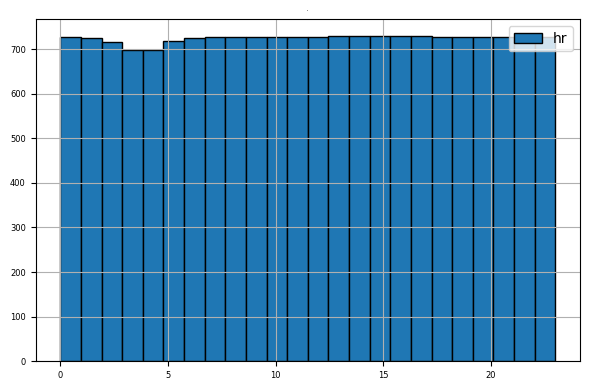

In [174]:
params = {'axes.titlesize':'0'}
matplotlib.rcParams.update(params)

hour_df.hist(column="hr",
            ec="k",
            bins=24,
            figsize=(6,4),
            legend=True,
            xlabelsize=6,
            ylabelsize=6)

plt.tight_layout()
plt.show()

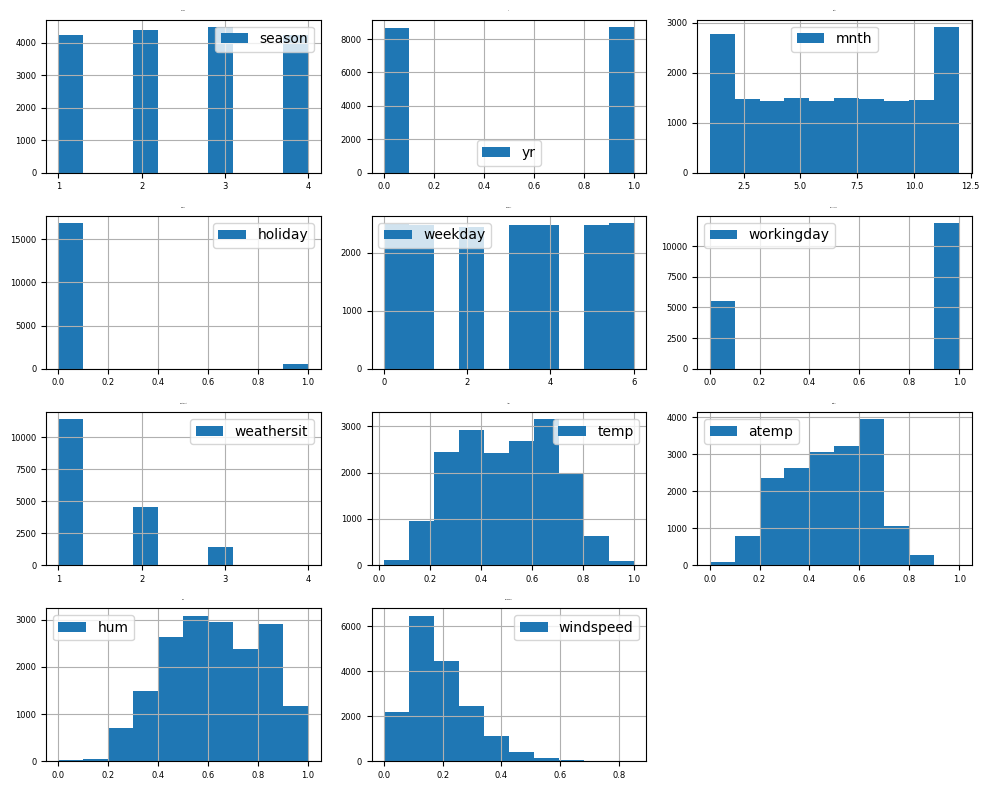

In [175]:
params = {'axes.titlesize':'0'}
matplotlib.rcParams.update(params)

hour_df.hist(column=["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"],
            figsize=(10,8),
            legend=True,
            xlabelsize=6,
            ylabelsize=6)

plt.tight_layout()
plt.show()

# matplotlib.rcParams.update(matplotlib.rcParamsDefault)  # to revert to default settings
# df.hist(figsize=(50, 30))

### Explore `day_df` & `hour_df`

#### Pengecekan kolom `dteday` untuk penggabungan data `day_df` dan `hour_df`

In [176]:
day_df.dteday.nunique()

731

In [177]:
hour_df.groupby(by="dteday").nunique().count()

instant             731
season              731
yr                  731
mnth                731
hr                  731
holiday             731
weekday             731
workingday          731
weathersit          731
temp                731
atemp               731
hum                 731
windspeed           731
casual              731
registered          731
cnt                 731
season_label        731
holiday_label       731
weekday_label       731
workingday_label    731
weathersit_label    731
dtype: int64

In [178]:
# cek kolom cnt merupakan hasil penjumlahan kolom casual dan registered pada dataframe hour_df

# Function to cnt_chek
def cnt_chek(casual, registered, cnt):
    if (casual + registered) == cnt:
        return "Equal"
    else:
        return "Not Equal"

cnt_chek_in_hour_df = hour_df.loc[:, ["casual","registered","cnt"]]

cnt_chek_in_hour_df["cnt_chek"] = cnt_chek_in_hour_df.apply(lambda row : cnt_chek(row['casual'],
                 row['registered'], row['cnt']), axis = 1)

cnt_chek_in_hour_df.groupby(by="cnt_chek").agg({
    "casual": ["count", "sum"],
    "registered": ["count", "sum"],
    "cnt": ["count", "sum"]
})

casual         registered             cnt         
          count     sum      count      sum  count      sum
cnt_chek                                                   
Equal     17379  620017      17379  2672662  17379  3292679

In [179]:
# cek kolom casual, registered, cnt pada dataframe day_df dengan hour_df

# Function to tahwcrc_chek
def tahwcrc_chek(casual_x, registered_x, cnt_x, casual_y, registered_y, cnt_y):
    if (casual_x == casual_y) & (registered_x == registered_y) & (cnt_x == cnt_y):
        return "Equal"
    else:
        return "Not Equal"

hour_day_tmp_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)

tahwcrc_chek_in_hour_day_df = hour_day_tmp_df.groupby(by="dteday").agg({
    "instant_x": "nunique",
    "temp_x" : "mean",
    "atemp_x" : "mean",
    "hum_x" : "mean",
    "windspeed_x" : "mean",
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"}).reset_index()

tahwcrc_chek_in_hour_day_df["dteday"] = pd.to_datetime(tahwcrc_chek_in_hour_day_df["dteday"])

tahwcrc_chek_in_hour_day_df["instant_y"] = day_df["instant"]
tahwcrc_chek_in_hour_day_df["temp_y"] = day_df["temp"]
tahwcrc_chek_in_hour_day_df["atemp_y"] = day_df["atemp"]
tahwcrc_chek_in_hour_day_df["hum_y"] = day_df["hum"]
tahwcrc_chek_in_hour_day_df["windspeed_y"] = day_df["windspeed"]
tahwcrc_chek_in_hour_day_df["casual_y"] = day_df["casual"]
tahwcrc_chek_in_hour_day_df["registered_y"] = day_df["registered"]
tahwcrc_chek_in_hour_day_df["cnt_y"] = day_df["cnt"]

tahwcrc_chek_in_hour_day_df["tahwcrc_chek"] = tahwcrc_chek_in_hour_day_df.apply(lambda row : tahwcrc_chek(row['casual_x'],
                                                                                                          row['registered_x'],
                                                                                                          row['cnt_x'],
                                                                                                          row['casual_y'],
                                                                                                          row['registered_y'],
                                                                                                          row['cnt_y']), axis = 1)

tahwcrc_chek_in_hour_day_df.groupby(by="tahwcrc_chek").agg({
    "casual_x": ["count", "sum"],
    "registered_x": ["count", "sum"],
    "cnt_x": ["count", "sum"],
    "casual_y": ["count", "sum"],
    "registered_y": ["count", "sum"],
    "cnt_y": ["count", "sum"]
})

casual_x         registered_x          cnt_x          casual_y  \
                count     sum        count      sum count      sum    count   
tahwcrc_chek                                                                  
Equal             731  620017          731  2672662   731  3292679      731   

                     registered_y          cnt_y           
                 sum        count      sum count      sum  
tahwcrc_chek                                               
Equal         620017          731  2672662   731  3292679

In [180]:
tahwcrc_chek_in_hour_day_df.describe()

,instant_x,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,cnt_x,instant_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,23.774282,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.350675,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,24.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,24.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,24.000000,0.655417,0.608602,0.730208,0.233215,1096.000000,4776.500000,5956.000000,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,24.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Jika diperhatikan maka nilai dari kolom **temp**, **atemp**, **hum**, **windspeed** pada data frame **day_df** adalah hasil dari penghitungan nilai rata-rata **(mean)** group by **dteday** pada data frame **hour_df**. Sedangkan nilai dari kolom **casual**, **registered**, **cnt** pada data frame **day_df** adalah hasil dari penghitungan nilai aggregat **(sum)** group by **dteday** pada data frame **hour_df**.

### Explore all data

#### Menghubungkan semua data

In [181]:
all_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,hum_y,windspeed_y,casual_y,registered_y,cnt_y,season_label_y,holiday_label_y,weekday_label_y,workingday_label_y,weathersit_label_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.805833,0.160446,331,654,985,Spring,Non Holiday,Sat,Non Working Day,Mist + Cloudy
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.805833,0.160446,331,654,985,Spring,Non Holiday,Sat,Non Working Day,Mist + Cloudy
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.805833,0.160446,331,654,985,Spring,Non Holiday,Sat,Non Working Day,Mist + Cloudy
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.805833,0.160446,331,654,985,Spring,Non Holiday,Sat,Non Working Day,Mist + Cloudy
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.805833,0.160446,331,654,985,Spring,Non Holiday,Sat,Non Working Day,Mist + Cloudy


In [182]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant_x           17379 non-null  int64         
 1   dteday              17379 non-null  datetime64[ns]
 2   season_x            17379 non-null  int64         
 3   yr_x                17379 non-null  int64         
 4   mnth_x              17379 non-null  int64         
 5   hr                  17379 non-null  int64         
 6   holiday_x           17379 non-null  int64         
 7   weekday_x           17379 non-null  int64         
 8   workingday_x        17379 non-null  int64         
 9   weathersit_x        17379 non-null  int64         
 10  temp_x              17379 non-null  float64       
 11  atemp_x             17379 non-null  float64       
 12  hum_x               17379 non-null  float64       
 13  windspeed_x         17379 non-null  float64   

In [183]:
all_df.groupby(by="season_label_x").agg({
    "casual_x": "sum",
    "registered_x": "sum",
    "cnt_x": "sum",
}).sort_values(by="cnt_x", ascending=False)

,casual_x,registered_x,cnt_x
season_label_x,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


In [184]:
day_df.groupby(by="season_label").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,casual,registered,cnt
season_label,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [185]:
hour_df.groupby(by="season_label").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum",
})

,casual,registered,cnt
season_label,,,
Fall,226091,835038,1061129
Spring,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [186]:
all_df.groupby(by="holiday_label_x").agg({
    "casual_x": "sum",
    "registered_x": "sum",
    "cnt_x": "sum",
})

,casual_x,registered_x,cnt_x
holiday_label_x,,,
Holiday,22359,56076,78435
Non Holiday,597658,2616586,3214244


In [187]:
all_df.groupby(by="weekday_label_x").agg({
    "casual_x": "sum",
    "registered_x": "sum",
    "cnt_x": "sum",
}).sort_values(by="cnt_x", ascending=False)

,casual_x,registered_x,cnt_x
weekday_label_x,,,
Fri,78238,409552,487790
Thur,61460,423935,485395
Sat,153852,323955,477807
Wed,57319,415729,473048
Tue,57843,411266,469109
Mon,70784,384719,455503
Sun,140521,303506,444027


In [188]:
all_df.groupby(by="workingday_label_x").agg({
    "casual_x": "sum",
    "registered_x": "sum",
    "cnt_x": "sum",
})

,casual_x,registered_x,cnt_x
workingday_label_x,,,
Non Working Day,316732,683537,1000269
Working Day,303285,1989125,2292410


In [189]:
all_df.groupby(by="weathersit_label_x").agg({
    "casual_x": "sum",
    "registered_x": "sum",
    "cnt_x": "sum",
}).sort_values(by="cnt_x", ascending=False)

,casual_x,registered_x,cnt_x
weathersit_label_x,,,
"Clear, Few Clouds",462745,1875428,2338173
Mist + Cloudy,134481,661471,795952
"Light Snow, Light Rain",22783,135548,158331
"Heavy Rain + Ice Pallets, Snow",8,215,223


In [190]:
all_df.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Bagaimana performa jumlah pengguna penyewaan sepeda dalam beberapa bulan terakhir tahun 2011-2012?

In [191]:
all_df.sample(5)

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,hum_y,windspeed_y,casual_y,registered_y,cnt_y,season_label_y,holiday_label_y,weekday_label_y,workingday_label_y,weathersit_label_y
4470,4471,2011-07-10,3,0,7,4,0,0,0,1,...,0.578333,0.183471,1743,3138,4881,Fall,Non Holiday,Sun,Non Working Day,"Clear, Few Clouds"
11175,11176,2012-04-15,2,1,4,20,0,0,0,1,...,0.507917,0.225129,2846,4286,7132,Summer,Non Holiday,Sun,Non Working Day,"Clear, Few Clouds"
16758,16759,2012-12-06,4,1,12,1,0,4,1,1,...,0.508750,0.174754,340,5035,5375,Winter,Non Holiday,Thur,Working Day,"Clear, Few Clouds"
8761,8762,2012-01-05,1,1,1,21,0,4,1,1,...,0.524167,0.129987,140,3132,3272,Spring,Non Holiday,Thur,Working Day,"Clear, Few Clouds"
1176,1177,2011-02-21,1,0,2,19,1,1,0,2,...,0.605000,0.307846,195,912,1107,Spring,Holiday,Mon,Non Working Day,Mist + Cloudy


In [192]:
def create_daily_bike_rentals_df(df):
    daily_bike_rentals_df = df.resample(rule='D', on='dteday').agg({
        "instant_x": "nunique",
        "casual_x" : "sum",
        "registered_x" : "sum",
        "cnt_x": "sum"
    }).reset_index()
    daily_bike_rentals_df["dteday"] = pd.to_datetime(daily_bike_rentals_df["dteday"])
    daily_bike_rentals_df.rename(columns={
        "casual_x" : "casual",
        "registered_x" : "registered",
        "cnt_x": "count"
    }, inplace=True)
    return daily_bike_rentals_df

daily_bike_rentals_df = create_daily_bike_rentals_df(all_df)
daily_bike_rentals_df.head()


,dteday,instant_x,casual,registered,count
0,2011-01-01,24,331,654,985
1,2011-01-02,23,131,670,801
2,2011-01-03,22,120,1229,1349
3,2011-01-04,23,108,1454,1562
4,2011-01-05,23,82,1518,1600


In [193]:
daily_bike_rentals_df["count"][1]

801

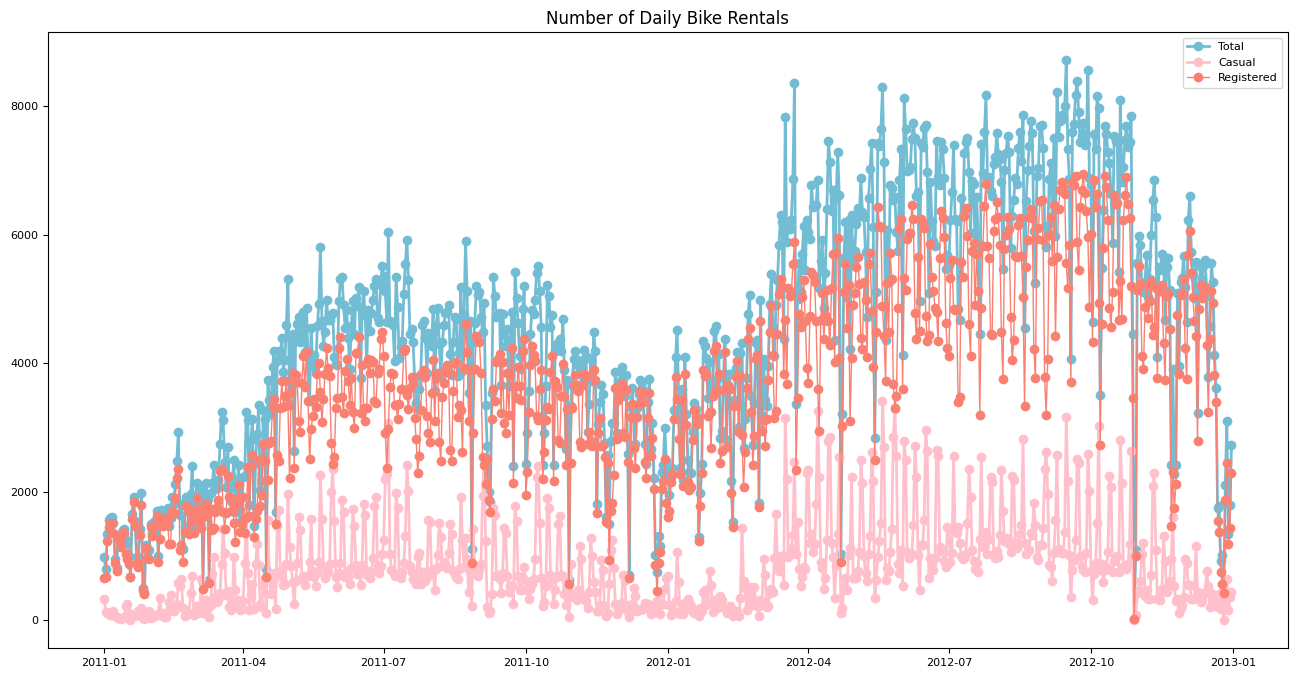

In [194]:
plt.figure(figsize=(16, 8))
plt.plot(
    daily_bike_rentals_df["dteday"],
    daily_bike_rentals_df["count"],
    marker='o',
    linewidth=2,
    color="#72BCD4",
    label="Total"
)
plt.plot(
    daily_bike_rentals_df["dteday"],
    daily_bike_rentals_df["casual"],
    marker='o',
    linewidth=2,
    color="pink",
    label="Casual"
)
plt.plot(
    daily_bike_rentals_df["dteday"],
    daily_bike_rentals_df["registered"],
    marker='o',
    linewidth=1,
    color="salmon",
    label="Registered"
)
plt.title("Number of Daily Bike Rentals", loc="center", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.show()

In [195]:
monthly_bike_rentals_df = all_df.groupby(by="dteday").agg({
    "instant_x": "nunique",
    "temp_x" : "mean",
    "atemp_x" : "mean",
    "hum_x" : "mean",
    "windspeed_x" : "mean",
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"
}).reset_index()
monthly_bike_rentals_df["dteday"] = pd.to_datetime(monthly_bike_rentals_df["dteday"])

monthly_bike_rentals_2011_df = monthly_bike_rentals_df[monthly_bike_rentals_df['dteday'].dt.strftime('%Y') == '2011']
monthly_bike_rentals_2011_df = monthly_bike_rentals_2011_df.resample(rule='M', on='dteday').agg({
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"
})
monthly_bike_rentals_2011_df.index = monthly_bike_rentals_2011_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_bike_rentals_2011_df = monthly_bike_rentals_2011_df.reset_index()
monthly_bike_rentals_2011_df.rename(columns={
    "casual_x" : "casual",
    "registered_x" : "registered",
    "cnt_x": "count"
}, inplace=True)

monthly_bike_rentals_2012_df = monthly_bike_rentals_df[monthly_bike_rentals_df['dteday'].dt.strftime('%Y') == '2012']
monthly_bike_rentals_2012_df = monthly_bike_rentals_2012_df.resample(rule='M', on='dteday').agg({
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"
})
monthly_bike_rentals_2012_df.index = monthly_bike_rentals_2012_df.index.strftime('%B') #mengubah format order date menjadi Tahun-Bulan
monthly_bike_rentals_2012_df = monthly_bike_rentals_2012_df.reset_index()
monthly_bike_rentals_2012_df.rename(columns={
    "casual_x" : "casual",
    "registered_x" : "registered",
    "cnt_x": "count"
}, inplace=True)

In [196]:
monthly_bike_rentals_2011_df.head()

,dteday,casual,registered,count
0,January,3073,35116,38189
1,February,6242,41973,48215
2,March,12826,51219,64045
3,April,22346,72524,94870
4,May,31050,104771,135821


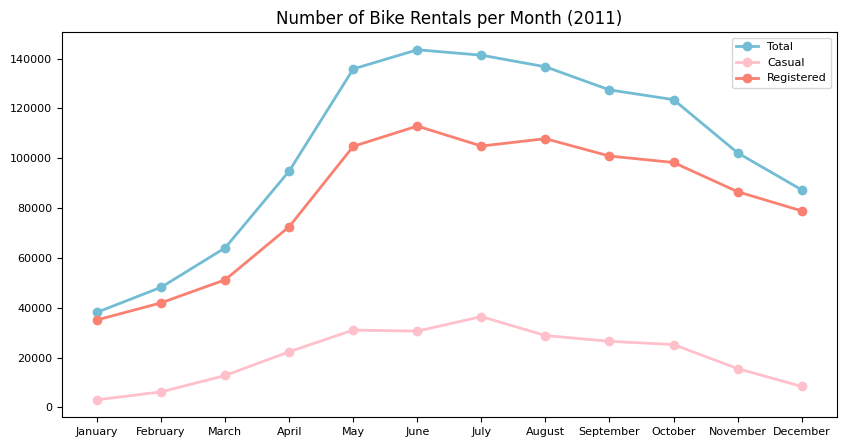

In [197]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_bike_rentals_2011_df["dteday"],
    monthly_bike_rentals_2011_df["count"],
    marker='o',
    linewidth=2,
    color="#72BCD4",
    label="Total"
)
plt.plot(
    monthly_bike_rentals_2011_df["dteday"],
    monthly_bike_rentals_2011_df["casual"],
    marker='o',
    linewidth=2,
    color="pink",
    label="Casual"
)
plt.plot(
    monthly_bike_rentals_2011_df["dteday"],
    monthly_bike_rentals_2011_df["registered"],
    marker='o',
    linewidth=2,
    color="salmon",
    label="Registered"
)
plt.title("Number of Bike Rentals per Month (2011)", loc="center", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.show()

In [198]:
monthly_bike_rentals_2012_df.head()

,dteday,casual,registered,count
0,January,8969,87775,96744
1,February,8721,94416,103137
2,March,31618,133257,164875
3,April,38456,135768,174224
4,May,44235,151630,195865


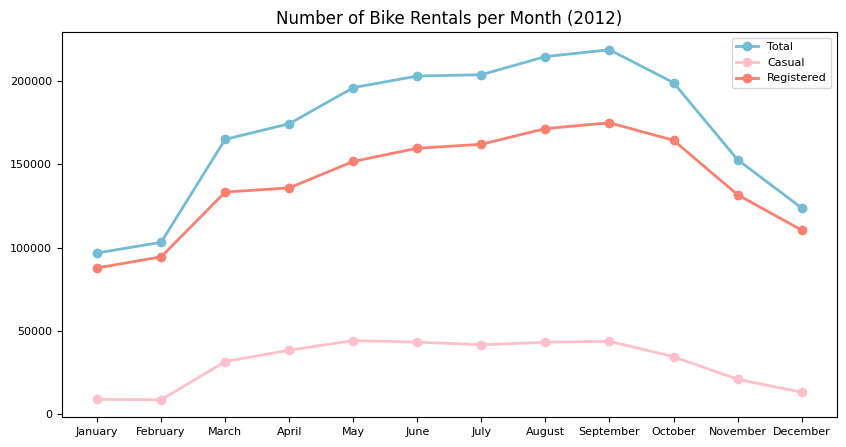

In [199]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_bike_rentals_2012_df["dteday"],
    monthly_bike_rentals_2012_df["count"],
    marker='o',
    linewidth=2,
    color="#72BCD4",
    label="Total"
)
plt.plot(
    monthly_bike_rentals_2012_df["dteday"],
    monthly_bike_rentals_2012_df["casual"],
    marker='o',
    linewidth=2,
    color="pink",
    label="Casual"
)
plt.plot(
    monthly_bike_rentals_2012_df["dteday"],
    monthly_bike_rentals_2012_df["registered"],
    marker='o',
    linewidth=2,
    color="salmon",
    label="Registered"
)
plt.title("Number of Bike Rentals per Month (2012)", loc="center", fontsize=12)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.show()

### Bagaimana jumlah pengguna penyewaan sepeda dalam berbagai musim?

In [200]:
seasonly_bike_rentals_df = all_df.groupby(by="season_label_x").agg({
    "casual_x": "sum",
    "registered_x": "sum",
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False).reset_index()

seasonly_bike_rentals_df.rename(columns={
    "season_label_x" : "season",
    "casual_x" : "casual",
    "registered_x" : "registered",
    "cnt_x": "count"
}, inplace=True)

seasonly_bike_rentals_df.head()

,season,casual,registered,count
0,Fall,226091,835038,1061129
1,Summer,203522,715067,918589
2,Winter,129782,711831,841613
3,Spring,60622,410726,471348


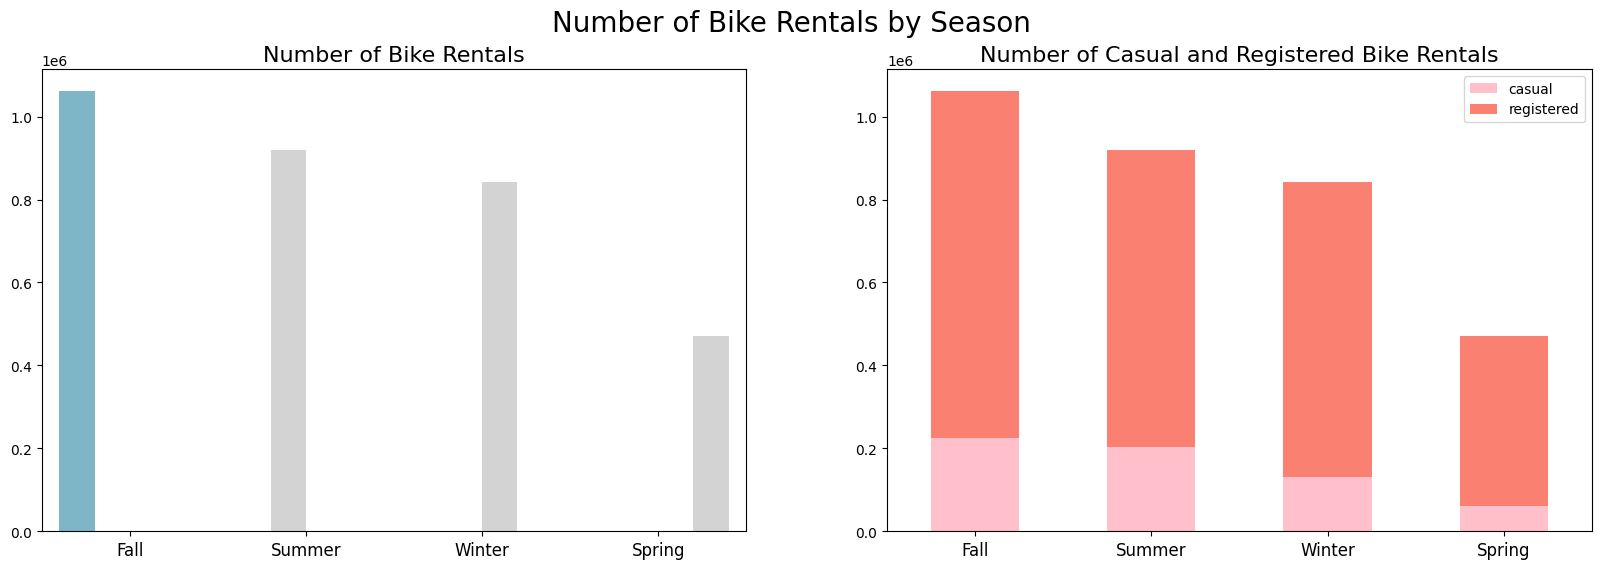

In [210]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.barplot(
    y="count",
    x="season",
    hue="season",
    # legend=False,
    data=seasonly_bike_rentals_df.sort_values(by="count", ascending=False),
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"],
    ax=ax[0]
)
ax[0].set_title("Number of Bike Rentals", loc="center", fontsize=16)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].legend([], [], frameon=False)

seasonly_bike_rentals_2_df = seasonly_bike_rentals_df.loc[:, ["season", "casual", "registered"]]
seasonly_bike_rentals_2_df.plot.bar(x='season', stacked=True, color=['pink', 'salmon'], ax=ax[1])
ax[1].set_title("Number of Casual and Registered Bike Rentals", loc="center", fontsize=16)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=12, rotation=0)



plt.suptitle("Number of Bike Rentals by Season", fontsize=20)
plt.show()

### Bagaimana jumlah pengguna penyewaan sepeda dalam berbagai hari?

In [211]:
weekday_bike_rentals_df = all_df.groupby(by="weekday_label_x").agg({
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False).reset_index()
weekday_bike_rentals_df.rename(columns={
    "weekday_label_x": "weekday",
    "casual_x" : "casual",
    "registered_x" : "registered",
    "cnt_x": "count"
}, inplace=True)
weekday_bike_rentals_df.head(7)

,weekday,casual,registered,count
0,Fri,78238,409552,487790
1,Thur,61460,423935,485395
2,Sat,153852,323955,477807
3,Wed,57319,415729,473048
4,Tue,57843,411266,469109
5,Mon,70784,384719,455503
6,Sun,140521,303506,444027


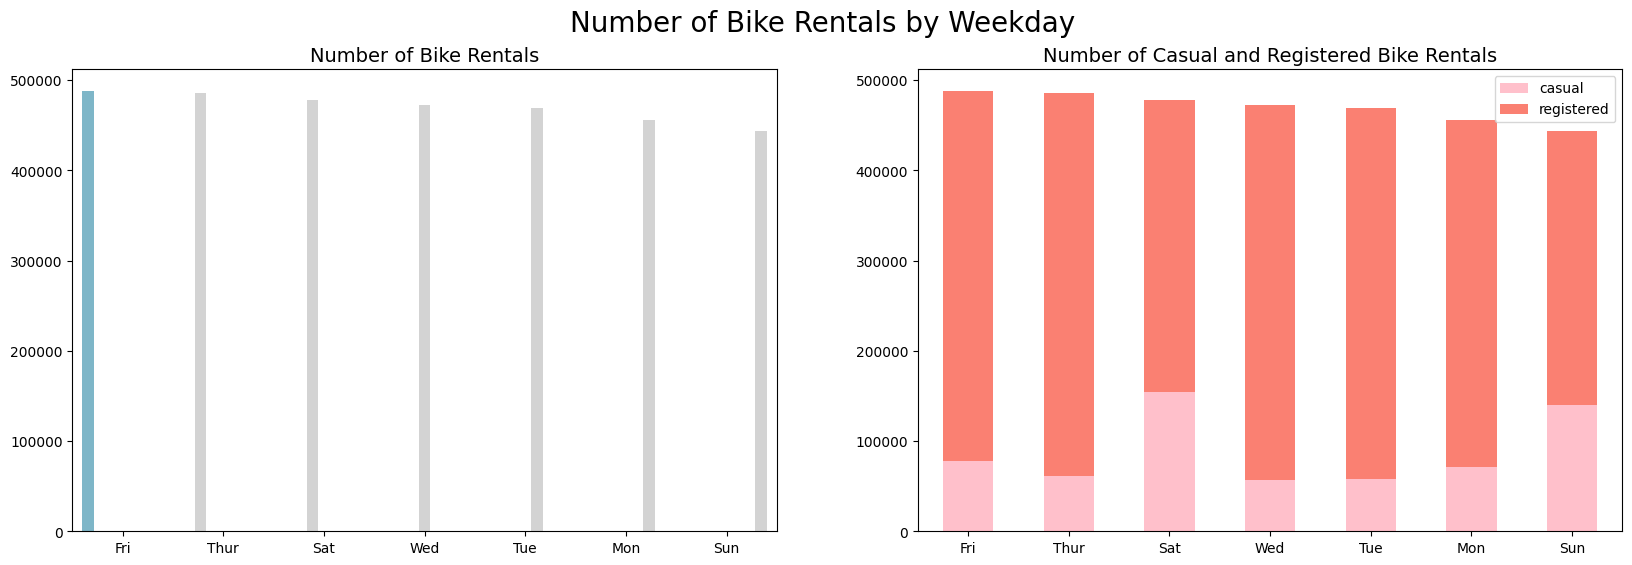

In [234]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.barplot(
    y="count",
    x="weekday",
    hue="weekday",
    # legend=False,
    data=weekday_bike_rentals_df.sort_values(by="count", ascending=False),
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"],
    ax=ax[0]
)
ax[0].set_title("Number of Bike Rentals", loc="center", fontsize=14)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].legend([], [], frameon=False)

weekday_bike_rentals_2_df = weekday_bike_rentals_df.loc[:, ["weekday", "casual", "registered"]]
weekday_bike_rentals_2_df.plot.bar(x='weekday', stacked=True, color=['pink', 'salmon'], ax=ax[1])
ax[1].set_title("Number of Casual and Registered Bike Rentals", loc="center", fontsize=14)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=10, rotation=0)

plt.suptitle("Number of Bike Rentals by Weekday", fontsize=20)
plt.show()

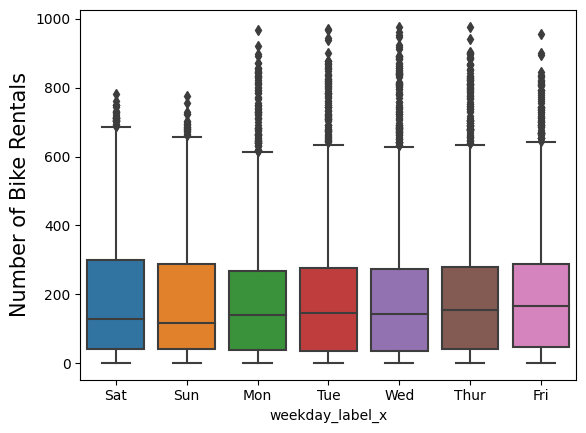

In [214]:
df_boxplot = all_df[["weekday_label_x", "cnt_x"]]

sns.boxplot(x="weekday_label_x", y="cnt_x", data=df_boxplot)
plt.ylabel('Number of Bike Rentals',size=15)
plt.show()

### Bagaimana jumlah pengguna penyewaan sepeda dalam berbagai jam?

In [215]:
hour_bike_rentals_df = all_df.groupby(by="hr").agg({
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False).reset_index()
hour_bike_rentals_df.rename(columns={
    "hr": "hour",
    "casual_x" : "casual",
    "registered_x" : "registered",
    "cnt_x": "count"
}, inplace=True)

hour_bike_rentals_df["hour"]= hour_bike_rentals_df["hour"].astype(str)

hour_bike_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hour        24 non-null     object
 1   casual      24 non-null     int64 
 2   registered  24 non-null     int64 
 3   count       24 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 896.0+ bytes


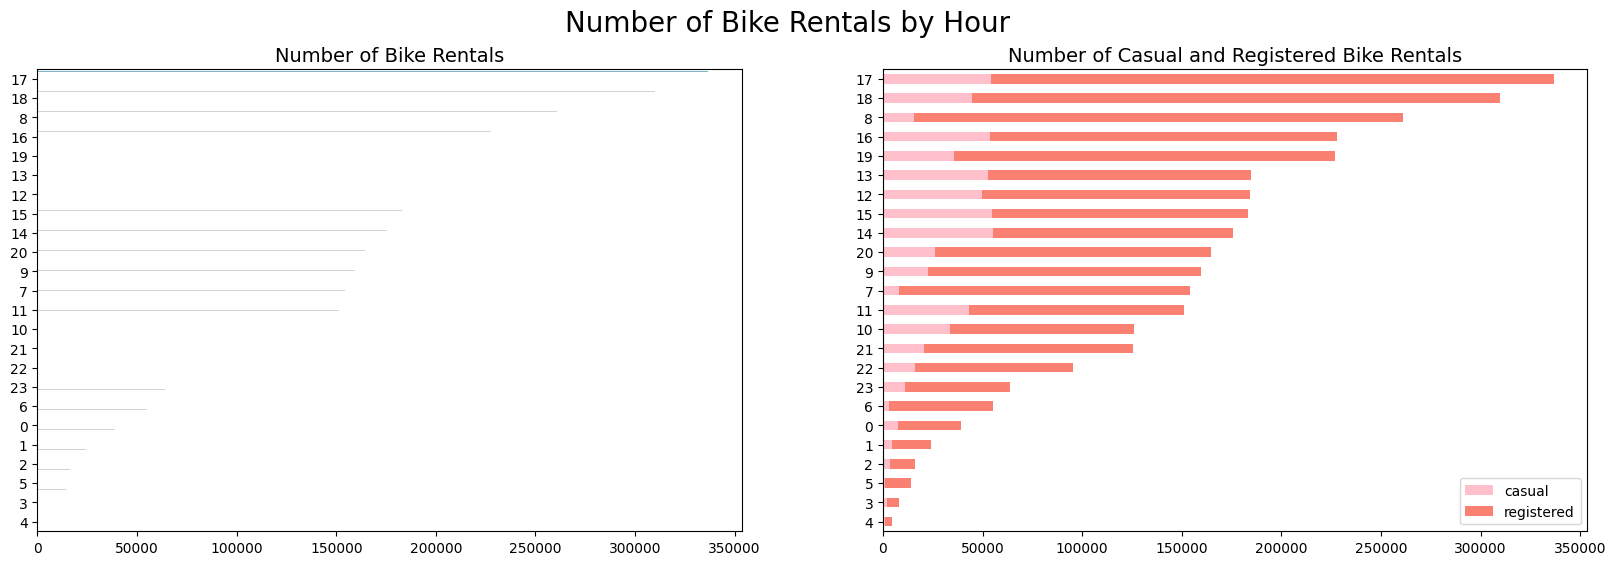

In [230]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",
            "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="count",
    y="hour",
    hue="hour",
    # legend=False,
    data=hour_bike_rentals_df.sort_values(by="count", ascending=False),
    palette=colors,
    ax=ax[0]
)
ax[0].set_title("Number of Bike Rentals", loc="center", fontsize=14)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].legend([], [], frameon=False)

hour_bike_rentals_df = hour_bike_rentals_df.sort_values(by="count", ascending=True)
hour_bike_rentals_2_df = hour_bike_rentals_df.loc[:, ["hour", "casual", "registered"]]
hour_bike_rentals_2_df.plot.barh(x='hour', stacked=True, color=['pink', 'salmon'], ax=ax[1])
ax[1].set_title("Number of Casual and Registered Bike Rentals", loc="center", fontsize=14)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=10, rotation=0)

plt.suptitle("Number of Bike Rentals by Hour", fontsize=20)
plt.show()

### Kategori pengguna penyewaan sepeda manakah yang paling banyak antar casual dan registered?

In [218]:
cat_bike_rentals_df = all_df.loc[:, ["casual_x", "registered_x"]]

cat_bike_rentals_df.rename(columns={
    "casual_x" : "Casual",
    "registered_x" : "Registered"
}, inplace=True)

cat_bike_rentals_df = cat_bike_rentals_df.agg({
    "Casual" : "sum",
    "Registered" : "sum",
}).reset_index()

cat_bike_rentals_df.rename(columns={
    "index" : "category",
    0 : "count"
}, inplace=True)

cat_bike_rentals_df.head()

,category,count
0,Casual,620017
1,Registered,2672662


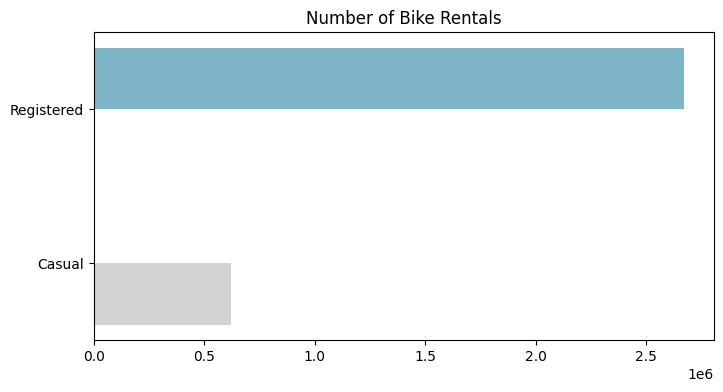

In [220]:
plt.figure(figsize=(8,4))

colors = ["#72BCD4", "#D3D3D3"]

sns.barplot(
    x="count",
    y="category",
    hue="category",
    # legend=False,
    data=cat_bike_rentals_df.sort_values(by="count", ascending=False),
    palette=colors
)
plt.title("Number of Bike Rentals", loc="center", fontsize=12)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.legend([], [], frameon=False)
plt.show()

### Bagaimana jumlah pengguna penyewaan sepeda pada hari libur atau tidak libur?

In [221]:
holiday_bike_rentals_df = all_df.groupby(by="holiday_label_x").agg({
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False).reset_index()
holiday_bike_rentals_df.rename(columns={
    "holiday_label_x": "holiday",
    "casual_x" : "casual",
    "registered_x" : "registered",
    "cnt_x": "count"
}, inplace=True)
holiday_bike_rentals_df.head()

,holiday,casual,registered,count
0,Non Holiday,597658,2616586,3214244
1,Holiday,22359,56076,78435


In [222]:
workingday_bike_rentals_df = all_df.groupby(by="workingday_label_x").agg({
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False).reset_index()
workingday_bike_rentals_df.rename(columns={
    "workingday_label_x": "workingday",
    "casual_x" : "casual",
    "registered_x" : "registered",
    "cnt_x": "count"
}, inplace=True)
workingday_bike_rentals_df.head()

,workingday,casual,registered,count
0,Working Day,303285,1989125,2292410
1,Non Working Day,316732,683537,1000269


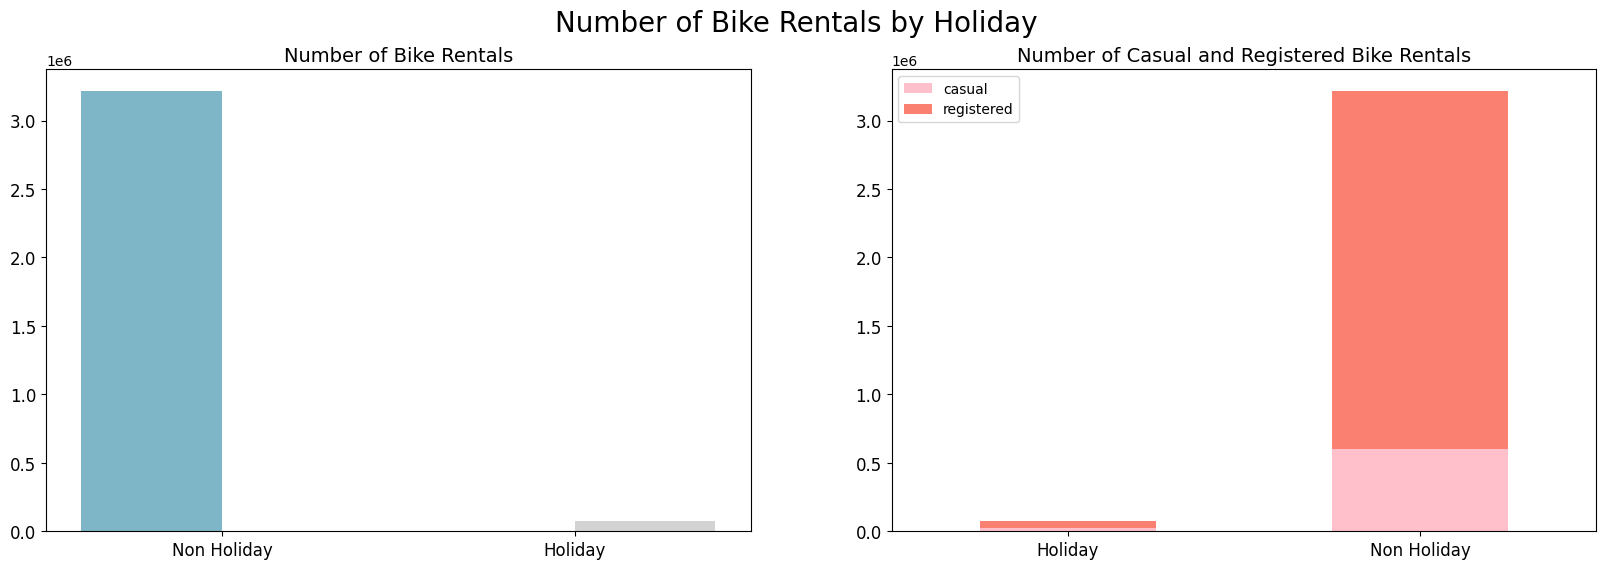

In [236]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.barplot(
    y="count",
    x="holiday",
    hue="holiday",
    # legend=False,
    data=holiday_bike_rentals_df.sort_values(by="count", ascending=False),
    palette=["#72BCD4", "#D3D3D3"],
    ax=ax[0]
)
ax[0].set_title("Number of Bike Rentals", loc="center", fontsize=14)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=12, rotation=0)
ax[0].tick_params(axis='y', labelsize=12, rotation=0)
ax[0].legend([], [], frameon=False)

holiday_bike_rentals_df = holiday_bike_rentals_df.sort_values(by="count", ascending=True)
holiday_bike_rentals_2_df = holiday_bike_rentals_df.loc[:, ["holiday", "casual", "registered"]]
holiday_bike_rentals_2_df.plot.bar(x='holiday', stacked=True, color=['pink', 'salmon'], ax=ax[1])
ax[1].set_title("Number of Casual and Registered Bike Rentals", loc="center", fontsize=14)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=12, rotation=0)
ax[1].tick_params(axis='y', labelsize=12, rotation=0)

plt.suptitle("Number of Bike Rentals by Holiday", fontsize=20)
plt.show()

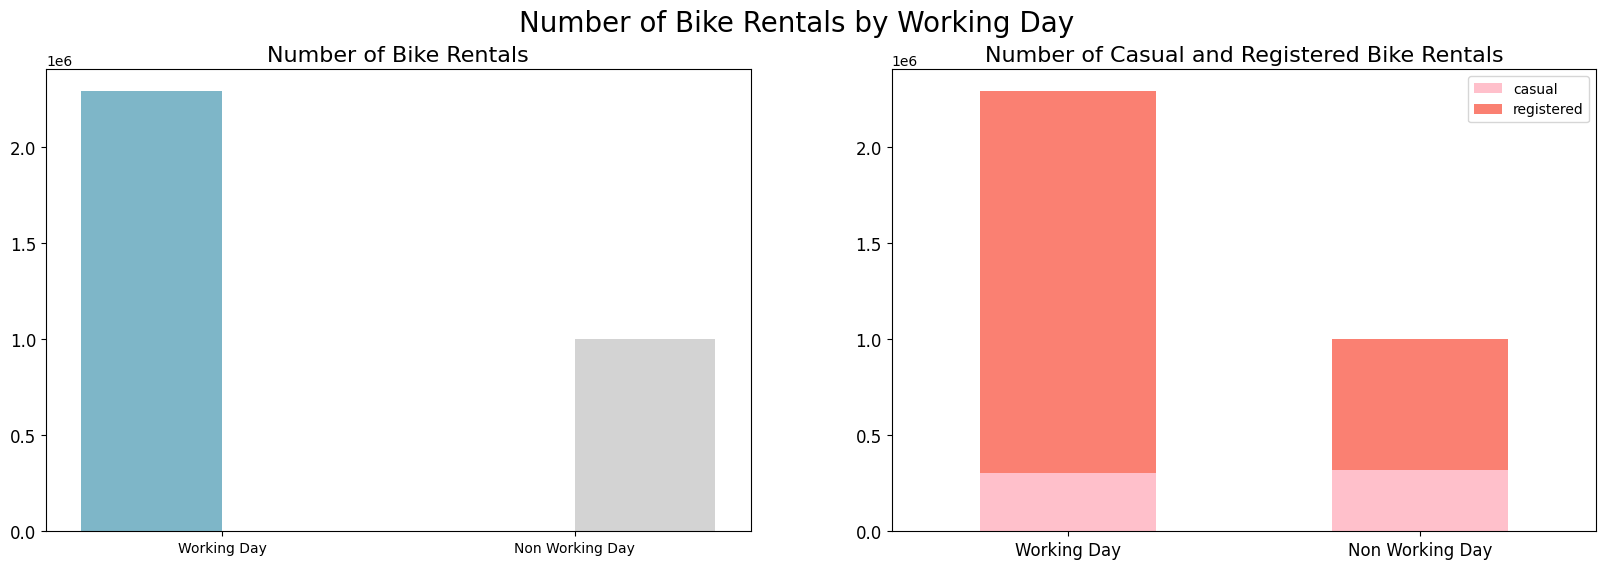

In [237]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

sns.barplot(
    y="count",
    x="workingday",
    hue="workingday",
    # legend=False,
    data=workingday_bike_rentals_df.sort_values(by="count", ascending=False),
    palette=["#72BCD4", "#D3D3D3"],
    ax=ax[0]
)
ax[0].set_title("Number of Bike Rentals", loc="center", fontsize=16)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=12, rotation=0)
ax[0].tick_params(axis='y', labelsize=12, rotation=0)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].legend([], [], frameon=False)

workingday_bike_rentals_df = workingday_bike_rentals_df.sort_values(by="count", ascending=False)
workingday_bike_rentals_2_df = workingday_bike_rentals_df.loc[:, ["workingday", "casual", "registered"]]
workingday_bike_rentals_2_df.plot.bar(x='workingday', stacked=True, color=['pink', 'salmon'], ax=ax[1])
ax[1].set_title("Number of Casual and Registered Bike Rentals", loc="center", fontsize=16)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=12, rotation=0)
ax[1].tick_params(axis='y', labelsize=12, rotation=0)

plt.suptitle("Number of Bike Rentals by Working Day", fontsize=20)
plt.show()

### Bagaimana jumlah pengguna penyewaan sepeda dalam berbagai kondisi cuaca?

In [238]:
weathersit_bike_rentals_df = all_df.groupby(by="weathersit_label_x").agg({
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"
}).sort_values(by="cnt_x", ascending=False).reset_index()
weathersit_bike_rentals_df.rename(columns={
    "weathersit_label_x": "weathersit",
    "casual_x" : "casual",
    "registered_x" : "registered",
    "cnt_x": "count"
}, inplace=True)
weathersit_bike_rentals_df.head()

,weathersit,casual,registered,count
0,"Clear, Few Clouds",462745,1875428,2338173
1,Mist + Cloudy,134481,661471,795952
2,"Light Snow, Light Rain",22783,135548,158331
3,"Heavy Rain + Ice Pallets, Snow",8,215,223


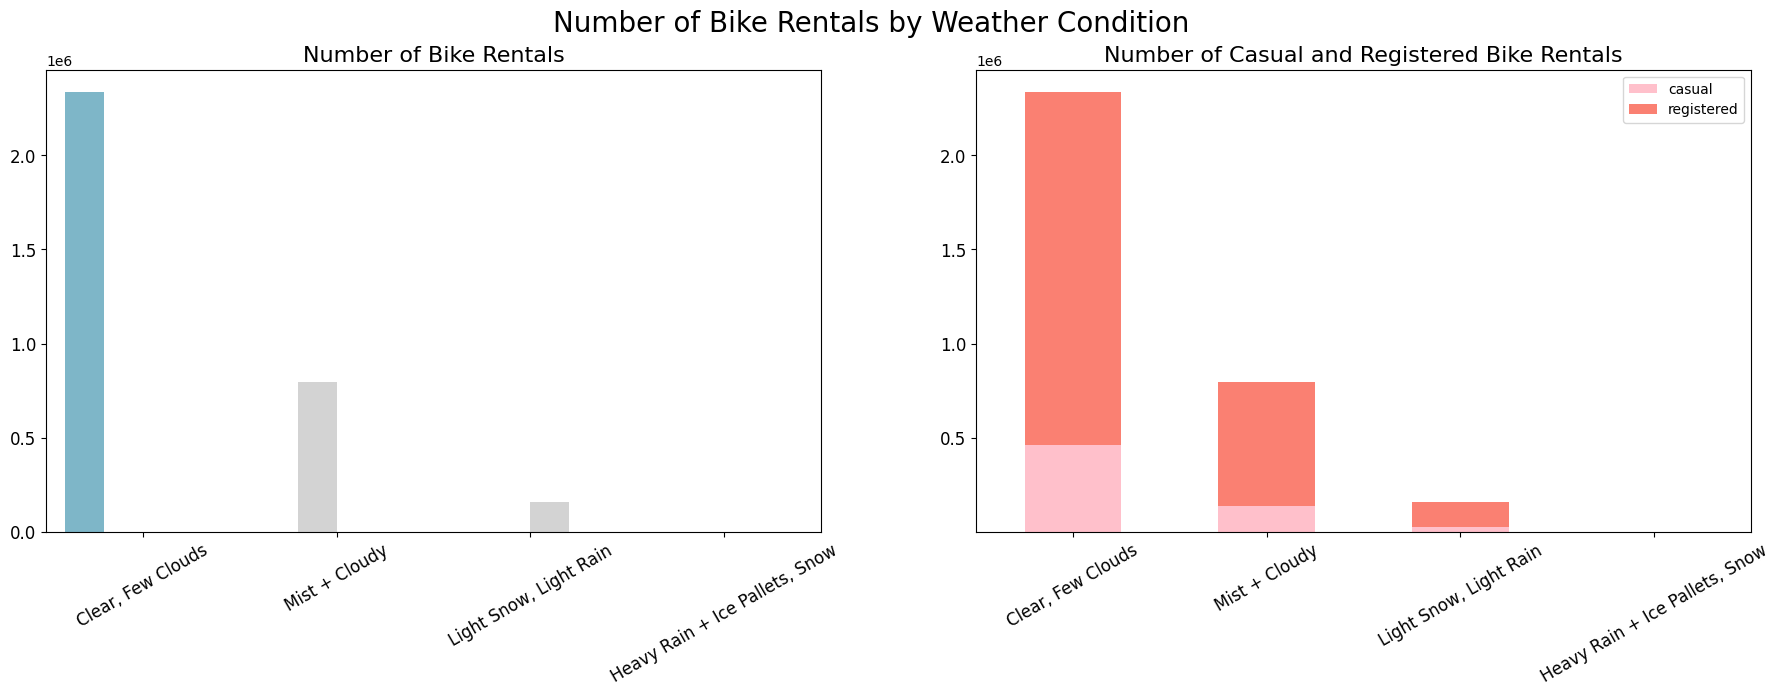

In [240]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))

sns.barplot(
    y="count",
    x="weathersit",
    hue="weathersit",
    # legend=False,
    data=weathersit_bike_rentals_df.sort_values(by="count", ascending=False),
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"],
    ax=ax[0]
)
ax[0].set_title("Number of Bike Rentals", loc="center", fontsize=16)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=12, rotation=30)
ax[0].tick_params(axis='y', labelsize=12, rotation=0)
ax[0].legend([], [], frameon=False)

weathersit_bike_rentals_df = weathersit_bike_rentals_df.sort_values(by="count", ascending=False)
weathersit_bike_rentals_2_df = weathersit_bike_rentals_df.loc[:, ["weathersit", "casual", "registered"]]
weathersit_bike_rentals_2_df.plot.bar(x="weathersit", stacked=True, color=['pink', 'salmon'], ax=ax[1])
ax[1].set_title("Number of Casual and Registered Bike Rentals", loc="center", fontsize=16)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=12, rotation=30)
ax[1].tick_params(axis='y', labelsize=12, rotation=0)

plt.suptitle("Number of Bike Rentals by Weather Condition", fontsize=20)
plt.show()

### Bagaimana huhungan antara kondisi suhu udara, suhu pengguna, kelembaban, kecepatan angin terhadap jumlah pengguna penyewaan sepeda?

In [241]:
tahw_bike_rentals_df = all_df.groupby(by="dteday").agg({
    "instant_x": "nunique",
    "temp_x" : "mean",
    "atemp_x" : "mean",
    "hum_x" : "mean",
    "windspeed_x" : "mean",
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"}).reset_index()
tahw_bike_rentals_df["dteday"] = pd.to_datetime(tahw_bike_rentals_df["dteday"])
tahw_bike_rentals_df.head()

,dteday,instant_x,temp_x,atemp_x,hum_x,windspeed_x,casual_x,registered_x,cnt_x
0,2011-01-01,24,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,23,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,22,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,23,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,23,0.226957,0.229270,0.436957,0.186900,82,1518,1600


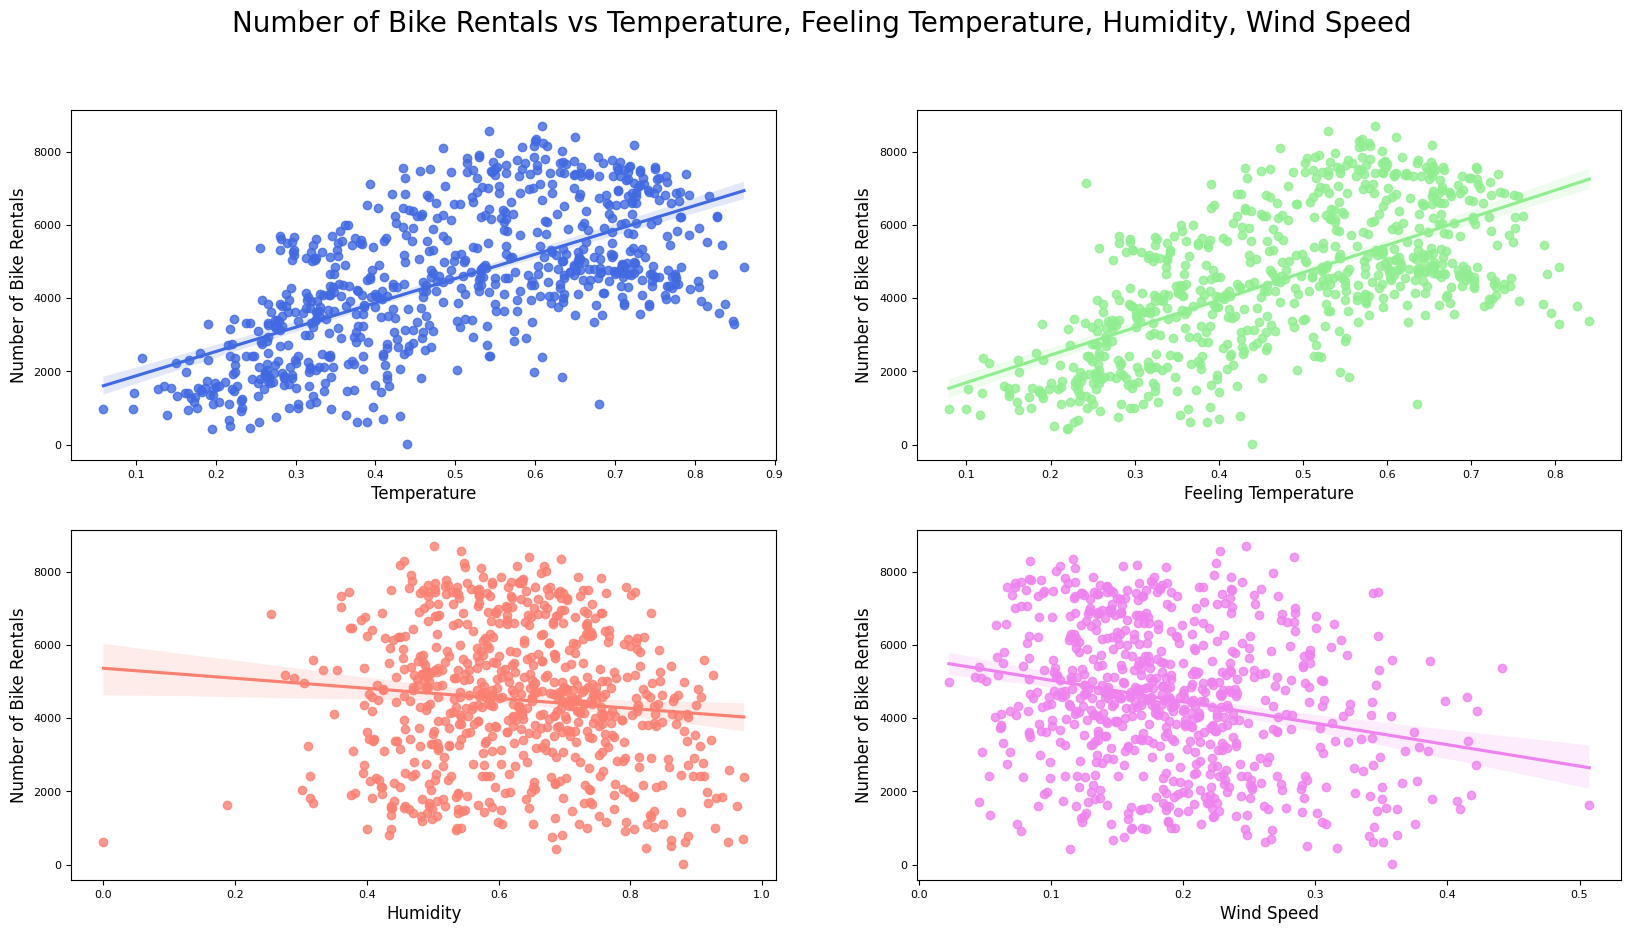

In [242]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

sns.regplot(
    y=tahw_bike_rentals_df["cnt_x"],
    x=tahw_bike_rentals_df["temp_x"],
    data = tahw_bike_rentals_df,
    color = "royalblue",
    ax=ax[0,0]
)
# ax[0,0].set_title("Number of Bike Rentals vs Temperature", loc="center", fontsize=12)
ax[0,0].set_ylabel("Number of Bike Rentals", loc="center", fontsize=12)
ax[0,0].set_xlabel("Temperature", loc="center", fontsize=12)
ax[0,0].tick_params(axis='x', labelsize=8, rotation=0)
ax[0,0].tick_params(axis='y', labelsize=8, rotation=0)

sns.regplot(
    y=tahw_bike_rentals_df["cnt_x"],
    x=tahw_bike_rentals_df["atemp_x"],
    data = tahw_bike_rentals_df,
    color = "lightgreen",
    ax=ax[0,1]
)
# ax[0,1].set_title("Number of Bike Rentals vs Feeling Temperature", loc="center", fontsize=12)
ax[0,1].set_ylabel("Number of Bike Rentals", loc="center", fontsize=12)
ax[0,1].set_xlabel("Feeling Temperature", loc="center", fontsize=12)
ax[0,1].tick_params(axis='x', labelsize=8, rotation=0)
ax[0,1].tick_params(axis='y', labelsize=8, rotation=0)

sns.regplot(
    y=tahw_bike_rentals_df["cnt_x"],
    x=tahw_bike_rentals_df["hum_x"],
    data = tahw_bike_rentals_df,
    color = "salmon",
    ax=ax[1,0]
)
# ax[1,0].set_title("Number of Bike Rentals vs Humidity", loc="center", fontsize=12)
ax[1,0].set_ylabel("Number of Bike Rentals", loc="center", fontsize=12)
ax[1,0].set_xlabel("Humidity", loc="center", fontsize=12)
ax[1,0].tick_params(axis='x', labelsize=8, rotation=0)
ax[1,0].tick_params(axis='y', labelsize=8, rotation=0)

sns.regplot(
    y=tahw_bike_rentals_df["cnt_x"],
    x=tahw_bike_rentals_df["windspeed_x"],
    data = tahw_bike_rentals_df,
    color = "violet",
    ax=ax[1,1]
)
# ax[1,1].set_title("Number of Bike Rentals vs Wind Speed_x", loc="center", fontsize=12)
ax[1,1].set_ylabel("Number of Bike Rentals", loc="center", fontsize=12)
ax[1,1].set_xlabel("Wind Speed", loc="center", fontsize=12)
ax[1,1].tick_params(axis='x', labelsize=8, rotation=0)
ax[1,1].tick_params(axis='y', labelsize=8, rotation=0)

plt.suptitle("Number of Bike Rentals vs Temperature, Feeling Temperature, Humidity, Wind Speed", fontsize=20)
plt.show()

### Clustering Analysis

In [243]:
ac_bike_rentals_df = all_df.groupby(by="dteday").agg({
    "instant_x": "nunique",
    "temp_x" : "mean",
    "atemp_x" : "mean",
    "hum_x" : "mean",
    "windspeed_x" : "mean",
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"}).reset_index()
ac_bike_rentals_df["dteday"] = pd.to_datetime(tahw_bike_rentals_df["dteday"])
ac_bike_rentals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dteday        731 non-null    datetime64[ns]
 1   instant_x     731 non-null    int64         
 2   temp_x        731 non-null    float64       
 3   atemp_x       731 non-null    float64       
 4   hum_x         731 non-null    float64       
 5   windspeed_x   731 non-null    float64       
 6   casual_x      731 non-null    int64         
 7   registered_x  731 non-null    int64         
 8   cnt_x         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 51.5 KB


In [244]:
all_df.to_csv("all_data.csv", index=False)

In [245]:
import math

# Cluster 1 initial temp, hum, windspeed
ac_bike_rentals_df["temp_c1"] = 0.555691
ac_bike_rentals_df["hum_c1"] =  0.653500
ac_bike_rentals_df["windspeed_c1"] = 0.087910
# Cluster 2 initial temp, hum, windspeed
ac_bike_rentals_df["temp_c2"] = 0.419783
ac_bike_rentals_df["hum_c2"] = 0.825200
ac_bike_rentals_df["windspeed_c2"] = 0.146418
# Cluster 3 initial temp, hum, windspeed
ac_bike_rentals_df["temp_c3"] = 0.144851
ac_bike_rentals_df["hum_c3"] = 0.488300
ac_bike_rentals_df["windspeed_c3"] = 0.235075

# Test Clustering Dataframe
i = 1
condition = True

test_cluster_df = pd.DataFrame.from_dict([{
    "No": 1,
    "temp_c1" : 0.555691,
    "hum_c1" : 0.653500,
    "windspeed_c1" : 0.087910,
    "temp_c2" : 0.419783,
    "hum_c2" : 0.825200,
    "windspeed_c2" : 0.235075,
    "temp_c3" : 0.144851,
    "hum_c3" : 0.488300,
    "windspeed_c3" : 0.146418,
    "cnt_c1": 0,
    "cnt_c2": 0,
    "cnt_c3": 0
}])

# Function
def clt1(temp_x, hum_x, windspeed_x, temp_c1, hum_c1, windspeed_c1):
    d_c1 = math.sqrt(math.pow((temp_x - temp_c1), 2) + math.pow((hum_x - hum_c1), 2) + math.pow((windspeed_x - windspeed_c1), 2))
    return d_c1

def clt2(temp_x, hum_x, windspeed_x, temp_c2, hum_c2, windspeed_c2):
    d_c2 = math.sqrt(math.pow((temp_x - temp_c2), 2) + math.pow((hum_x - hum_c2), 2) + math.pow((windspeed_x - windspeed_c2), 2))
    return d_c2

def clt3(temp_x, hum_x, windspeed_x, temp_c3, hum_c3, windspeed_c3):
    d_c3 = math.sqrt(math.pow((temp_x - temp_c3), 2) + math.pow((hum_x - hum_c3), 2) + math.pow((windspeed_x - windspeed_c3), 2))
    return d_c3

def clt4(dc1, dc2, dc3, label):
    # Create a DataFrame
    d = {"cluster": ["Cluster 1", "Cluster 2", "Cluster 3"],
         "cluster_label": ["High-T, Mid-H, Mid-W", "Mid-T, High-H, Low-W", "Low-T, Low-H, High-W"],
         "dc": [dc1, dc2, dc3]}

    df = pd.DataFrame(d, columns=["cluster","dc"])
    dc_min = df['dc'].min()

    if (dc_min == dc1):
        if (not label):
            return "Cluster 1"
        else:
            return "High-T, Mid-H, Mid-W"
    if (dc_min == dc2):
        if (not label):
            return "Cluster 2"
        else:
            return "Mid-T, High-H, Low-W"
    if (dc_min == dc3):
        if (not label):
            return "Cluster 3"
        else:
            return "Low-T, Low-H, High-W"


while (condition == True):
    ac_bike_rentals_df["d_c1"] = ac_bike_rentals_df.apply(lambda row : clt1(row["temp_x"],
                                              row["hum_x"],
                                              row["windspeed_x"],
                                              row["temp_c1"],
                                              row["hum_c1"],
                                              row["windspeed_c1"]), axis = 1)

    ac_bike_rentals_df["d_c2"] = ac_bike_rentals_df.apply(lambda row : clt2(row["temp_x"],
                                              row["hum_x"],
                                              row["windspeed_x"],
                                              row["temp_c2"],
                                              row["hum_c2"],
                                              row["windspeed_c2"]), axis = 1)

    ac_bike_rentals_df["d_c3"] = ac_bike_rentals_df.apply(lambda row : clt3(row["temp_x"],
                                              row["hum_x"],
                                              row["windspeed_x"],
                                              row["temp_c3"],
                                              row["hum_c3"],
                                              row["windspeed_c3"]), axis = 1)

    ac_bike_rentals_df["cluster"] = ac_bike_rentals_df.apply(lambda row : clt4(row["d_c1"],
                                              row["d_c2"],
                                              row["d_c3"], False), axis = 1)

    ac_bike_rentals_df["cluster_label"] = ac_bike_rentals_df.apply(lambda row : clt4(row["d_c1"],
                                              row["d_c2"],
                                              row["d_c3"], True), axis = 1)

    thw_ac_bike_rentals_df = ac_bike_rentals_df.groupby(by="cluster").agg({
        "temp_x" : "mean",
        "hum_x" : "mean",
        "windspeed_x" : "mean",
        "casual_x" : "sum",
        "registered_x" : "sum",
        "cnt_x" : "sum",
    })

    i += 1
    new_record = pd.DataFrame([{
        "No": i,
        "temp_c1" : thw_ac_bike_rentals_df["temp_x"]["Cluster 1"].round(6),
        "hum_c1" : thw_ac_bike_rentals_df["hum_x"]["Cluster 1"].round(6),
        "windspeed_c1" : thw_ac_bike_rentals_df["windspeed_x"]["Cluster 1"].round(6),
        "temp_c2" : thw_ac_bike_rentals_df["temp_x"]["Cluster 2"].round(6),
        "hum_c2" : thw_ac_bike_rentals_df["hum_x"]["Cluster 2"].round(6),
        "windspeed_c2" : thw_ac_bike_rentals_df["windspeed_x"]["Cluster 2"].round(6),
        "temp_c3" : thw_ac_bike_rentals_df["temp_x"]["Cluster 3"].round(6),
        "hum_c3" : thw_ac_bike_rentals_df["hum_x"]["Cluster 3"].round(6),
        "windspeed_c3" : thw_ac_bike_rentals_df["windspeed_x"]["Cluster 3"].round(6),
        "cnt_c1" : thw_ac_bike_rentals_df["cnt_x"]["Cluster 1"],
        "cnt_c2" : thw_ac_bike_rentals_df["cnt_x"]["Cluster 2"],
        "cnt_c3" : thw_ac_bike_rentals_df["cnt_x"]["Cluster 3"]
    }])

    test_cluster_df = pd.concat([test_cluster_df, new_record], ignore_index=True)

    if (test_cluster_df["temp_c1"][i-1] == test_cluster_df["temp_c1"][i-2]) & \
        (test_cluster_df["hum_c1"][i-1] == test_cluster_df["hum_c1"][i-2]) & \
        (test_cluster_df["windspeed_c1"][i-1] == test_cluster_df["windspeed_c1"][i-2]) & \
        (test_cluster_df["temp_c2"][i-1] == test_cluster_df["temp_c2"][i-2]) & \
        (test_cluster_df["hum_c2"][i-1] == test_cluster_df["hum_c2"][i-2]) & \
        (test_cluster_df["windspeed_c2"][i-1] == test_cluster_df["windspeed_c2"][i-2]) & \
        (test_cluster_df["temp_c3"][i-1] == test_cluster_df["temp_c3"][i-2]) & \
        (test_cluster_df["hum_c3"][i-1] == test_cluster_df["hum_c3"][i-2]) & \
        (test_cluster_df["windspeed_c3"][i-1] == test_cluster_df["windspeed_c3"][i-2]):
        condition = False
    else:
        condition = True
        # Cluster 1
        ac_bike_rentals_df["temp_c1"] = thw_ac_bike_rentals_df["temp_x"]["Cluster 1"]
        ac_bike_rentals_df["hum_c1"] = thw_ac_bike_rentals_df["hum_x"]["Cluster 1"]
        ac_bike_rentals_df["windspeed_c1"] = thw_ac_bike_rentals_df["windspeed_x"]["Cluster 1"]
        # Cluster 2
        ac_bike_rentals_df["temp_c2"] = thw_ac_bike_rentals_df["temp_x"]["Cluster 2"]
        ac_bike_rentals_df["hum_c2"] = thw_ac_bike_rentals_df["hum_x"]["Cluster 2"]
        ac_bike_rentals_df["windspeed_c2"] = thw_ac_bike_rentals_df["windspeed_x"]["Cluster 2"]
        # Cluster 3
        ac_bike_rentals_df["temp_c3"] = thw_ac_bike_rentals_df["temp_x"]["Cluster 3"]
        ac_bike_rentals_df["hum_c3"] = thw_ac_bike_rentals_df["hum_x"]["Cluster 3"]
        ac_bike_rentals_df["windspeed_c3"] = thw_ac_bike_rentals_df["windspeed_x"]["Cluster 3"]

test_cluster_df

,No,temp_c1,hum_c1,windspeed_c1,temp_c2,hum_c2,windspeed_c2,temp_c3,hum_c3,windspeed_c3,cnt_c1,cnt_c2,cnt_c3
0,1,0.555691,0.653500,0.087910,0.419783,0.825200,0.235075,0.144851,0.488300,0.146418,0,0,0
1,2,0.630814,0.613585,0.176516,0.403888,0.780181,0.183350,0.282405,0.487653,0.231369,2165689,624990,502000
2,3,0.659480,0.621452,0.176617,0.408291,0.772267,0.179320,0.305593,0.492245,0.225336,1925032,691814,675833
3,4,0.670427,0.623526,0.178286,0.416352,0.772786,0.175319,0.315646,0.498723,0.222349,1811390,717606,763683
4,5,0.674149,0.622311,0.177094,0.420392,0.775942,0.174483,0.320053,0.503206,0.222936,1772385,720600,799694
5,6,0.674891,0.621338,0.177455,0.423899,0.778394,0.172748,0.321089,0.505099,0.223163,1755561,722835,814283
6,7,0.676066,0.620731,0.176894,0.425389,0.778719,0.171842,0.322422,0.505928,0.224303,1740345,728960,823374
7,8,0.677783,0.621676,0.176913,0.425389,0.778719,0.171842,0.324784,0.506205,0.223670,1721892,728960,841827
8,9,0.678927,0.621614,0.177584,0.426218,0.777262,0.170921,0.324784,0.506205,0.223670,1708549,742303,841827
9,10,0.679157,0.621023,0.177687,0.427127,0.777347,0.170806,0.324784,0.506205,0.223670,1703434,747418,841827


Jika diperhatikan pada iterasi (**No**)  ke-**10** dan ke-**11** didapatkan nilai yang **sama** untuk masing-masing nilai **temperture, humidity, windspeed** pada Cluster 1 **(temp_c1, hum_c1, windspeed_c1)**, Cluster 2 **(temp_c2, hum_c2, windspeed_c2)** dan Cluster 3 **(temp_c3, hum_c3, windspeed_c3)** begitu pula didapatkan nilai yang **sama** untuk masing-masing nilai **jumlah** pada Cluster 1 **(cnt_c1)**, Cluster 2 **(cnt_c2)** dan Cluster 3 **(cnt_c3)** sehingga clustering jumlah pengguna penyewaan sepeda sudah bisa dianalisis. <br> <br> Pengelompokan Clustering : <br> - **Clustering 1** (High Temperature, Middle Humidity, Middle Wind Speed) <br> - **Clustering 2** (Middle Temperature, High Humidity, Low Wind Speed) <br> - **Clustering 3** (Low Temperature, Low Humidity, High Wind Speed)

In [246]:
ac_bike_rentals_df.groupby("cluster").dteday.count().sort_values(ascending=False).reset_index().head()

,cluster,dteday
0,Cluster 1,293
1,Cluster 3,234
2,Cluster 2,204


In [247]:
ac_bike_rentals_df.groupby("cluster_label").dteday.count().sort_values(ascending=False).reset_index().head()

,cluster_label,dteday
0,"High-T, Mid-H, Mid-W",293
1,"Low-T, Low-H, High-W",234
2,"Mid-T, High-H, Low-W",204


In [248]:
clustering_bike_rentals_df = ac_bike_rentals_df.groupby(by="cluster_label").agg({
    "dteday" : "nunique",
    "temp_x" : "mean",
    "hum_x" : "mean",
    "windspeed_x" : "mean",
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"}).sort_values(by="cnt_x", ascending=False).reset_index()

clustering_bike_rentals_df.rename(columns={
    "temp_x" : "temp",
    "hum_x" : "hum",
    "windspeed" : "windspeed",
    "casual_x" : "casual",
    "registered_x" : "registered",
    "cnt_x": "count"
}, inplace=True)

clustering_bike_rentals_df.head()

,cluster_label,dteday,temp,hum,windspeed_x,casual,registered,count
0,"High-T, Mid-H, Mid-W",293,0.679157,0.621023,0.177687,367860,1335574,1703434
1,"Low-T, Low-H, High-W",234,0.324784,0.506205,0.223670,128528,713299,841827
2,"Mid-T, High-H, Low-W",204,0.427127,0.777347,0.170806,123629,623789,747418


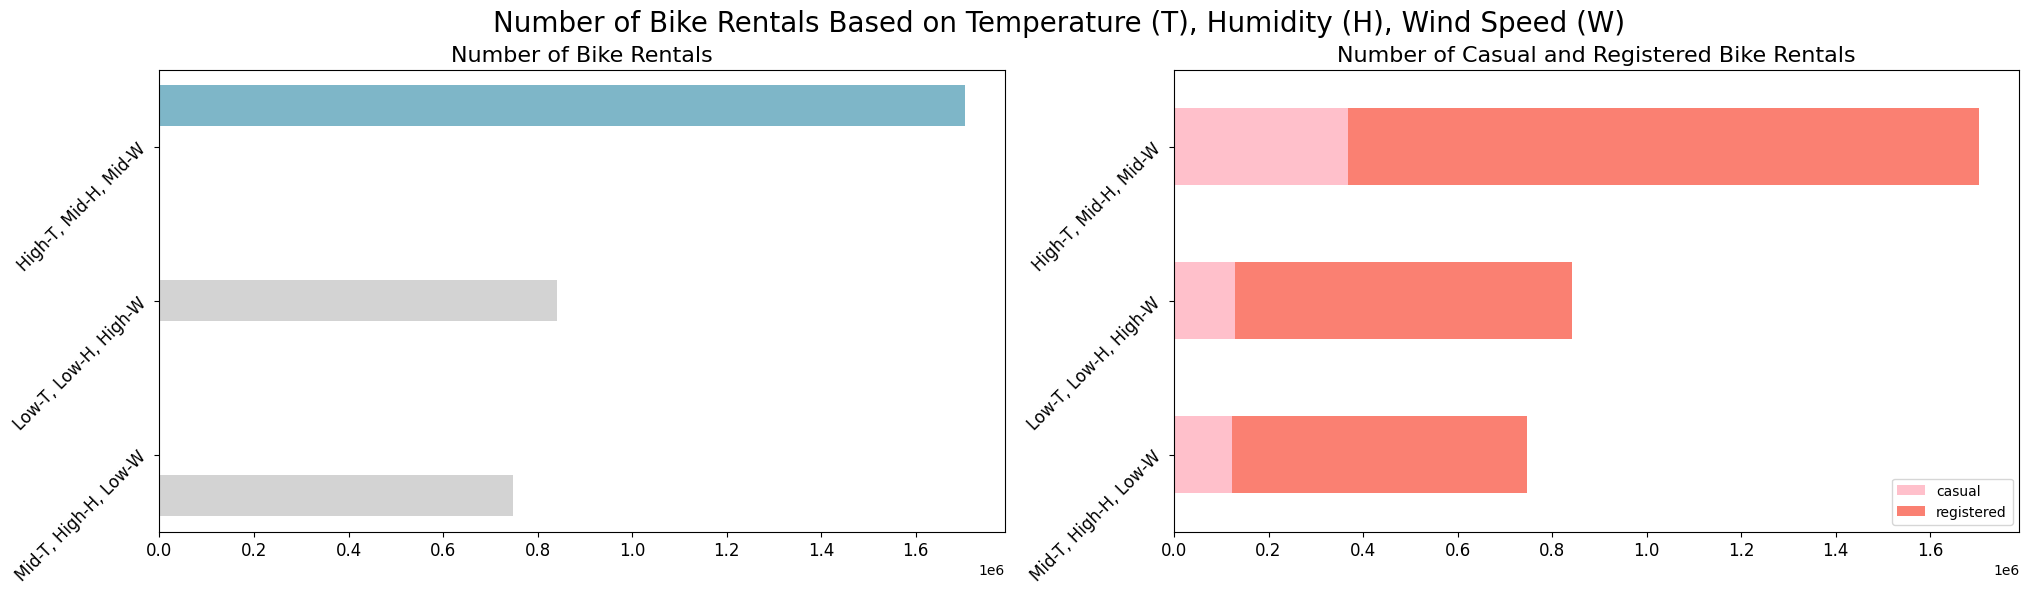

In [250]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(
    x="count",
    y="cluster_label",
    hue="cluster_label",
    # legend=False,
    data=clustering_bike_rentals_df.sort_values(by="count", ascending=False),
    palette=["#72BCD4", "#D3D3D3", "#D3D3D3"],
    ax=ax[0]
)
ax[0].set_title("Number of Bike Rentals", loc="center", fontsize=16)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].tick_params(axis='x', labelsize=12, rotation=0)
ax[0].tick_params(axis='y', labelsize=12, rotation=45)
ax[0].legend([], [], frameon=False)

clustering_bike_rentals_df = clustering_bike_rentals_df.sort_values(by="count", ascending=True)
clustering_bike_rentals_2_df = clustering_bike_rentals_df.loc[:, ["cluster_label", "casual", "registered"]]
clustering_bike_rentals_2_df.plot.barh(x='cluster_label', stacked=True, color=['pink', 'salmon'], ax=ax[1])
ax[1].set_title("Number of Casual and Registered Bike Rentals", loc="center", fontsize=16)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].tick_params(axis='x', labelsize=12, rotation=0)
ax[1].tick_params(axis='y', labelsize=12, rotation=45)

plt.suptitle("Number of Bike Rentals Based on Temperature (T), Humidity (H), Wind Speed (W)", fontsize=20)
plt.show()

In [251]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant_x           17379 non-null  int64         
 1   dteday              17379 non-null  datetime64[ns]
 2   season_x            17379 non-null  int64         
 3   yr_x                17379 non-null  int64         
 4   mnth_x              17379 non-null  int64         
 5   hr                  17379 non-null  int64         
 6   holiday_x           17379 non-null  int64         
 7   weekday_x           17379 non-null  int64         
 8   workingday_x        17379 non-null  int64         
 9   weathersit_x        17379 non-null  int64         
 10  temp_x              17379 non-null  float64       
 11  atemp_x             17379 non-null  float64       
 12  hum_x               17379 non-null  float64       
 13  windspeed_x         17379 non-null  float64   

In [252]:
# penambahan kolom cluster,cluster_label pada dataframe all_df
test_ac_df = ac_bike_rentals_df.loc[:, ["dteday", "cluster", "cluster_label"]]

all_df = pd.merge(
    left=all_df,
    right=test_ac_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   instant_x           17379 non-null  int64         
 1   dteday              17379 non-null  datetime64[ns]
 2   season_x            17379 non-null  int64         
 3   yr_x                17379 non-null  int64         
 4   mnth_x              17379 non-null  int64         
 5   hr                  17379 non-null  int64         
 6   holiday_x           17379 non-null  int64         
 7   weekday_x           17379 non-null  int64         
 8   workingday_x        17379 non-null  int64         
 9   weathersit_x        17379 non-null  int64         
 10  temp_x              17379 non-null  float64       
 11  atemp_x             17379 non-null  float64       
 12  hum_x               17379 non-null  float64       
 13  windspeed_x         17379 non-null  float64   

In [253]:
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,casual_y,registered_y,cnt_y,season_label_y,holiday_label_y,weekday_label_y,workingday_label_y,weathersit_label_y,cluster,cluster_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,331,654,985,Spring,Non Holiday,Sat,Non Working Day,Mist + Cloudy,Cluster 2,"Mid-T, High-H, Low-W"
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,331,654,985,Spring,Non Holiday,Sat,Non Working Day,Mist + Cloudy,Cluster 2,"Mid-T, High-H, Low-W"
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,331,654,985,Spring,Non Holiday,Sat,Non Working Day,Mist + Cloudy,Cluster 2,"Mid-T, High-H, Low-W"
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,331,654,985,Spring,Non Holiday,Sat,Non Working Day,Mist + Cloudy,Cluster 2,"Mid-T, High-H, Low-W"
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,331,654,985,Spring,Non Holiday,Sat,Non Working Day,Mist + Cloudy,Cluster 2,"Mid-T, High-H, Low-W"


In [254]:
all_df.to_csv("all_data.csv", index=False)

In [255]:
cluster_thw_df = all_df.groupby(by="cluster_label").agg({
    "dteday" : "nunique",
    "temp_x" : "mean",
    "hum_x" : "mean",
    "windspeed_x" : "mean",
    "casual_x" : "sum",
    "registered_x" : "sum",
    "cnt_x": "sum"}).sort_values(by="cnt_x", ascending=False).reset_index()

cluster_thw_df.rename(columns={
    "temp_x" : "temp",
    "hum_x" : "hum",
    "windspeed_x" : "windspeed",
    "casual_x" : "casual",
    "registered_x" : "registered",
    "cnt_x": "count"
}, inplace=True)

cluster_thw_df


,cluster_label,dteday,temp,hum,windspeed,casual,registered,count
0,"High-T, Mid-H, Mid-W",293,0.679165,0.620877,0.177375,367860,1335574,1703434
1,"Low-T, Low-H, High-W",234,0.325972,0.505766,0.224130,128528,713299,841827
2,"Mid-T, High-H, Low-W",204,0.428541,0.776326,0.169445,123629,623789,747418
